# Introduction
In this project, I analyzed India’s inflation trends using Consumer Price Index (CPI) data from the govdata.xlsx file. My goal was to understand how the cost of living has changed over time and what’s driving it.

I started by loading and cleaning the data, fixing missing values, formatting dates, and organizing the dataset for analysis. Then, I processed the data to calculate monthly and yearly trends, percentage changes, and rolling averages.

Next, I did exploratory data analysis (EDA) to study patterns across different categories like food, fuel, housing, and health. I looked at seasonal trends, identified which categories were most volatile, and compared the growth of essentials vs. non-essentials over time.

I also used time series models like ARIMA, SARIMA, and Prophet to forecast future inflation trends, especially for key sectors like Fuel and Light. Finally, I analyzed correlations between categories and explored how events like COVID-19 and government policies affected inflation.

This project helped me draw meaningful insights about India’s inflation behavior and the shifting cost of living.




## Data loading

Loading All India Consumer Price Index (Rural/Urban) upto May 2023 data from "https://visualize.data.gov.in/?inst=52f9cf0d-2258-4005-a398-567935038654"

In [3]:
import pandas as pd

df = pd.read_csv("/content/govdata.csv")
display(df.head())

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


## Data cleaning

Check for missing values and duplicate rows in the DataFrame.Since there are no duplicate rows, the next step is to examine the data types and identify columns that should be numerical but are not, then attempt to convert them.


In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows:")
print(df.duplicated().sum())

Missing values per column:
Sector                                   0
Year                                     0
Month                                    0
Cereals and products                     3
Meat and fish                            6
Egg                                      3
Milk and products                        3
Oils and fats                            3
Fruits                                   3
Vegetables                               3
Pulses and products                      3
Sugar and Confectionery                  3
Spices                                   3
Non-alcoholic beverages                  3
Prepared meals, snacks, sweets etc.      6
Food and beverages                       3
Pan, tobacco and intoxicants             6
Clothing                                 6
Footwear                                 6
Clothing and footwear                    6
Housing                                122
Fuel and light                           3
Household goods and service

In [ ]:
print("Data types before conversion:")
df.info()

# Identify columns that are not object type and are not numerical
# Based on the column names and the task (price indices), most columns except Sector, Year, Month should be numerical.
columns_to_convert = [col for col in df.columns if col not in ['Sector', 'Year', 'Month']]

print("\nAttempting to convert columns to numeric:")
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData types after conversion:")
df.info()

print("\nMissing values after conversion:")
print(df.isnull().sum())

Data types before conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               372 non-null    object 
 1   Year                                 372 non-null    int64  
 2   Month                                372 non-null    object 
 3   Cereals and products                 369 non-null    float64
 4   Meat and fish                        366 non-null    float64
 5   Egg                                  369 non-null    float64
 6   Milk and products                    369 non-null    float64
 7   Oils and fats                        369 non-null    float64
 8   Fruits                               369 non-null    float64
 9   Vegetables                           369 non-null    float64
 10  Pulses and products                  369 non-null    float64
 11  Su

In [4]:
import pandas as pd

# Step 1: Standardize capitalization and remove extra spaces
df['Month'] = df['Month'].str.strip().str.capitalize()

# Step 2: Replace known typos with correct month names
month_corrections = {
    'Janaury': 'January',
    'Janury': 'January',
    'Febuary': 'February',
    'Febraury': 'February',
    'Marcrh': 'March',
    'Aplril': 'April',
    'Auguest': 'August',
    'Septembar': 'September',
    'Ocotber': 'October',
    'Novemeber': 'November',
    'Decmeber': 'December'
}
df['Month'] = df['Month'].replace(month_corrections)

# Step 3: Combine 'Year' and cleaned 'Month' into a datetime column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Optional: Set 'Date' as index (useful for time series analysis)
df.set_index('Date', inplace=True)

# Optional: Display first few rows to verify
print(df.head())


                 Sector  Year     Month  Cereals and products  Meat and fish  \
Date                                                                           
2013-01-01        Rural  2013   January                 107.5          106.3   
2013-01-01        Urban  2013   January                 110.5          109.1   
2013-01-01  Rural+Urban  2013   January                 108.4          107.3   
2013-02-01        Rural  2013  February                 109.2          108.7   
2013-02-01        Urban  2013  February                 112.9          112.9   

              Egg  Milk and products  Oils and fats  Fruits  Vegetables  ...  \
Date                                                                     ...   
2013-01-01  108.1              104.9          106.1   103.9       101.9  ...   
2013-01-01  113.0              103.6          103.4   102.3       102.9  ...   
2013-01-01  110.0              104.4          105.1   103.2       102.2  ...   
2013-02-01  110.2              105.4   

## Data exploration

Explore the dataset to understand its structure, columns, and basic statistics. Identify the time column and category columns.


In [ ]:
# 1. Display the shape of the DataFrame
print("DataFrame shape:", df.shape)

# 2. Display the column names and their data types
print("\nDataFrame info:")
df.info()

# 3. Display basic descriptive statistics for numerical columns
print("\nDescriptive statistics:")
display(df.describe())

# 4. Identify and print the time column
# Based on column names, 'Year' and 'Month' together represent the time.
time_columns = ['Year', 'Month']
print("\nTime columns:", time_columns)

# 5. Identify and print the names of the category columns
# Assuming all columns except 'Sector', 'Year', 'Month', and 'General index' are category columns.
category_columns = [col for col in df.columns if col not in ['Sector', 'Year', 'Month', 'General index']]
print("\nCategory columns:", category_columns)

DataFrame shape: (372, 30)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               372 non-null    object 
 1   Year                                 372 non-null    int64  
 2   Month                                372 non-null    object 
 3   Cereals and products                 369 non-null    float64
 4   Meat and fish                        366 non-null    float64
 5   Egg                                  369 non-null    float64
 6   Milk and products                    369 non-null    float64
 7   Oils and fats                        369 non-null    float64
 8   Fruits                               369 non-null    float64
 9   Vegetables                           369 non-null    float64
 10  Pulses and products                  369 non-null    f

,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
count,372.000000,369.000000,366.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,246.000000,369.000000,366.000000,369.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2017.709677,136.685908,156.264754,140.797561,140.325203,132.126287,140.840921,155.752033,141.430894,110.924932,...,139.256098,136.510027,136.686885,138.516802,127.170492,133.891803,141.131148,133.350000,134.235792,139.564481
std,3.027567,14.998301,33.354866,22.523518,18.354428,29.956816,17.370694,27.906705,23.940469,9.017864,...,21.157414,22.252814,19.324347,23.702083,19.165566,20.129860,21.206478,23.146324,20.808214,20.377036
min,2013.000000,107.500000,106.300000,102.700000,103.600000,101.100000,102.300000,101.400000,103.500000,85.300000,...,100.300000,105.400000,104.800000,104.000000,103.200000,102.900000,103.500000,102.100000,103.700000,104.000000
25%,2015.000000,124.200000,130.325000,122.100000,128.300000,110.500000,130.400000,135.100000,119.900000,103.500000,...,120.150000,116.500000,121.000000,118.600000,111.700000,117.225000,123.950000,112.500000,116.625000,123.525000
50%,2018.000000,135.900000,144.200000,135.500000,141.000000,120.500000,141.300000,153.500000,139.100000,113.300000,...,141.300000,132.200000,135.000000,133.600000,119.700000,129.850000,139.950000,127.650000,129.650000,137.150000
75%,2020.000000,146.400000,191.000000,162.400000,154.000000,140.700000,152.600000,171.200000,164.300000,118.800000,...,157.400000,149.000000,150.675000,157.200000,141.225000,149.975000,160.200000,156.100000,150.650000,156.575000
max,2023.000000,174.800000,223.400000,197.000000,179.600000,209.900000,179.500000,245.300000,191.600000,124.200000,...,175.600000,183.400000,179.800000,187.800000,169.700000,173.800000,180.300000,185.600000,179.500000,179.800000



Time columns: ['Year', 'Month']

Category columns: ['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.', 'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light', 'Household goods and services', 'Health', 'Transport and communication', 'Recreation and amusement', 'Education', 'Personal care and effects', 'Miscellaneous']


## Insight 1
Vegetables and Fruits show high standard deviation → large price swings, these categories are highly seasonal and vulnerable to climate or supply chain disruptions.

Pulses, Oils and fats, Milk, and Prepared meals steadily increased → processed or essential food items are major contributors to long-term food inflation.

Housing costs have grown ~75% → likely reflecting urbanization and rental market pressure.

Health and Education rose from ~104 to ~188 → becoming significantly more expensive and are major non-food inflation drivers.

General Index increased from ~104 in 2013 to ~180 in 2023 → indicating a ~73% rise in overall consumer prices over the decade.

Prepared meals, Non-alcoholic beverages, and Personal care categories saw consistent growth → pointing to rising disposable income and a shift toward convenience and lifestyle-focused consumption.

Fuel and light and Transport and communication show correlated trends → indicating fuel prices directly influence commuting and logistics costs.

Clothing, Footwear, and Education showed lower standard deviation → making them more stable price categories and reliable inflation anchors.

Food categories like Cereals, Pulses, and Milk have less month-to-month fluctuation compared to Vegetables and Fruits → suggesting they are less affected by seasonal supply issues.

Pan, Tobacco, and Intoxicants remained relatively stable in price → possibly due to government regulation and taxation maintaining controlled inflation.

Core inflation (excluding Food and Fuel) remained steady → helpful for monetary policy analysis, as headline inflation spikes often stem from volatile food or energy items.

Recreation and Amusement, and Household Goods showed moderate growth → reflecting a gradual rise in middle-class discretionary spending.

Spices and Sugar showed slower price growth → possibly due to effective supply chain and storage systems stabilizing costs over time.

## Data analysis



In [5]:
# 1. Combine 'Year' and 'Month' to create a datetime index
# Create a date string and convert to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Set the new 'Date' column as the index
df = df.set_index('Date')

# Sort the DataFrame by the new datetime index
df = df.sort_index()

# Identify columns for aggregation (all numerical columns except Year, Month which are now part of index)
columns_to_aggregate = df.select_dtypes(include='number').columns

# 2. Group by the datetime index and calculate the mean for monthly trends
# Since the index is already monthly, simple aggregation works
monthly_trends = df[columns_to_aggregate].groupby(df.index).mean()

print("Monthly Trends (Mean):")
display(monthly_trends.head())
display(monthly_trends.tail())


# 3. Resample to a yearly frequency and calculate the mean for yearly trends
yearly_trends = monthly_trends.resample('Y').mean()

print("\nYearly Trends (Mean):")
display(yearly_trends.head())
display(yearly_trends.tail())

# 4. Analyze monthly trends for seasonality - this is done by visual inspection or further statistical methods,
# but the data is prepared here. We can look at the monthly_trends DataFrame.
print("\nColumns available for seasonality analysis in monthly trends:")
print(monthly_trends.columns.tolist())

Monthly Trends (Mean):


,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,2013.0,108.800000,107.566667,110.366667,104.300000,104.866667,103.133333,102.333333,105.966667,106.033333,...,106.133333,105.466667,104.800000,104.033333,103.233333,103.133333,103.633333,104.500000,103.866667,104.566667
2013-02-01,2013.0,110.833333,110.600000,113.300000,104.766667,105.233333,103.566667,103.500000,105.100000,104.866667,...,106.733333,105.966667,105.200000,104.533333,104.166667,103.633333,103.900000,104.466667,104.366667,105.266667
2013-03-01,2013.0,111.833333,109.966667,111.433333,105.000000,104.600000,105.300000,102.466667,104.733333,103.933333,...,107.266667,106.066667,105.633333,104.933333,105.066667,103.733333,104.033333,104.266667,104.733333,105.500000
2013-04-01,2013.0,112.133333,111.266667,106.500000,105.566667,104.066667,108.900000,106.200000,105.200000,103.233333,...,107.866667,106.466667,106.300000,105.366667,104.700000,104.233333,105.000000,102.933333,104.833333,106.066667
2013-05-01,2013.0,112.866667,111.766667,104.433333,106.600000,103.566667,109.333333,114.633333,105.700000,102.900000,...,108.466667,107.366667,106.933333,105.933333,104.000000,104.800000,105.600000,102.333333,104.833333,106.900000


,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,2023.0,173.700000,211.400000,194.800000,174.700000,185.933333,158.366667,157.366667,170.933333,121.366667,...,183.000000,181.766667,172.700000,181.833333,163.766667,169.7,174.633333,178.600000,172.733333,176.400000
2023-02-01,2023.0,174.433333,208.366667,175.433333,177.400000,178.300000,169.600000,156.466667,171.200000,120.333333,...,184.300000,182.166667,174.000000,183.933333,164.333333,170.5,175.333333,181.033333,174.000000,177.166667
2023-03-01,2023.0,174.466667,208.366667,175.433333,177.400000,178.233333,169.600000,156.533333,171.266667,120.333333,...,184.300000,181.966667,174.000000,183.933333,164.333333,170.5,175.333333,181.066667,174.000000,177.166667
2023-04-01,2023.0,173.966667,209.966667,169.966667,178.466667,174.033333,176.400000,159.366667,173.633333,121.600000,...,184.933333,181.766667,174.433333,184.566667,164.666667,170.9,176.666667,184.066667,174.933333,178.100000
2023-05-01,2023.0,173.866667,215.066667,173.633333,179.500000,169.233333,172.333333,164.900000,175.800000,122.933333,...,185.433333,182.900000,175.033333,185.233333,164.966667,171.4,177.400000,185.233333,175.600000,179.033333



Yearly Trends (Mean):


<ipython-input-5-1741366189>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_trends = monthly_trends.resample('Y').mean()


,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,2013.0,114.516667,113.969444,112.441667,108.302778,104.755556,108.827778,135.338889,106.275000,103.108333,...,109.938889,108.544444,108.005556,106.766667,106.666667,105.916667,107.688889,104.986111,106.763889,110.013889
2014-12-31,2014.0,122.052778,122.383333,119.272222,119.861111,106.908333,124.766667,139.547222,113.197222,101.663889,...,118.483333,113.355556,114.900000,112.497222,111.516667,111.877778,115.469444,109.144444,112.536111,117.327778
2015-12-31,2015.0,124.105556,128.997222,119.633333,127.613889,110.563889,129.441667,144.155556,143.269444,93.688889,...,125.383333,119.022222,121.013889,118.213889,111.158333,117.105556,123.108333,112.413889,116.416667,123.036111
2016-12-31,2016.0,128.222222,137.863889,129.097222,132.513889,115.466667,132.975000,145.155556,172.258333,108.783333,...,131.788889,122.575000,126.575000,123.900000,113.469444,122.247222,129.897222,119.513889,121.369444,129.100000
2017-12-31,2017.0,133.841667,141.977778,131.600000,138.161111,118.130556,139.772222,144.694444,137.244444,120.036111,...,137.627778,129.280556,131.694444,128.938889,117.430556,126.836111,136.186111,124.027778,126.200000,133.386111


,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,2019.0,140.109091,158.851515,141.524242,144.284848,122.542424,144.654545,165.324242,128.460606,111.663636,...,147.048485,138.775758,144.136364,146.924242,125.787879,140.424242,153.742424,136.518182,139.372727,144.127273
2020-12-31,2020.0,147.696970,184.180000,156.718182,152.996970,136.263636,147.436364,187.675758,149.424242,115.563636,...,150.906667,143.327273,147.476667,153.472727,136.283333,146.693333,157.803333,151.846667,147.510000,153.330000
2021-12-31,2021.0,146.708333,199.702778,173.138889,157.019444,176.036111,158.147222,171.322222,163.338889,116.933333,...,160.186111,158.708333,155.000000,165.133333,150.700000,155.944444,162.536111,158.738889,157.508333,161.416667
2022-12-31,2022.0,158.277778,210.325000,173.211111,166.636111,190.705556,164.594444,182.358333,166.372222,120.619444,...,175.427778,174.969444,166.566667,175.352778,161.241667,165.900000,170.197222,169.536111,167.697222,172.075000
2023-12-31,2023.0,174.086667,210.633333,177.853333,177.493333,177.146667,169.260000,158.926667,172.566667,121.313333,...,184.393333,182.113333,174.033333,183.900000,164.413333,170.600000,175.873333,182.000000,174.253333,177.573333



Columns available for seasonality analysis in monthly trends:
['Year', 'Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.', 'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear', 'Fuel and light', 'Household goods and services', 'Health', 'Transport and communication', 'Recreation and amusement', 'Education', 'Personal care and effects', 'Miscellaneous', 'General index']


In [ ]:
# Analyze seasonality patterns by grouping monthly trends by month
# Extract the month from the datetime index
monthly_trends['Month'] = monthly_trends.index.month

# Group by month and calculate the mean for each column
seasonal_pattern = monthly_trends.groupby('Month')[columns_to_aggregate].mean()

print("\nAverage Seasonal Pattern (Mean across years for each month):")
display(seasonal_pattern)

# Drop the temporary 'Month' column from monthly_trends
monthly_trends = monthly_trends.drop(columns=['Month'])


Average Seasonal Pattern (Mean across years for each month):


,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Month,,,,,,,,,,,,,,,,,,,,,
1,2018.0,136.136364,153.436364,146.324242,139.136364,131.045455,134.796970,148.403030,140.681818,110.536364,...,138.045455,135.539394,136.006061,137.818182,126.200000,133.024242,140.048485,132.739394,133.415152,138.154545
2,2018.0,136.615152,153.490909,142.681818,139.796970,131.215152,136.312121,139.412121,139.557576,110.021212,...,139.027273,136.584848,136.518182,138.633333,126.775758,133.660606,140.315152,133.612121,134.021212,138.175758
3,2018.0,136.924242,155.066667,139.624242,140.248485,132.469697,138.439394,136.696970,138.736364,109.951515,...,139.309091,137.378788,136.893939,139.084848,127.263636,134.178788,140.621212,133.893939,134.433333,138.496970
4,2017.9,137.373333,155.592593,136.593333,141.190000,134.653333,145.900000,139.393333,142.336667,111.336667,...,139.300000,137.440000,135.725926,138.810000,127.900000,133.151852,138.570370,133.562963,133.729630,138.103704
5,2018.0,136.740000,158.243333,136.283333,140.636667,134.053333,145.510000,142.016667,141.230000,110.566667,...,139.050000,137.863333,137.316667,139.203333,128.230000,134.466667,140.530000,134.090000,134.846667,139.476667
6,2017.5,134.906667,158.483333,138.150000,138.696667,131.310000,142.986667,150.150000,139.800000,110.070000,...,137.030000,134.306667,134.896667,136.436667,125.666667,132.513333,139.483333,131.060000,132.483333,137.773333
7,2017.5,135.416667,158.726667,140.243333,139.370000,130.780000,144.360000,161.263333,140.096667,110.343333,...,137.960000,134.973333,135.460000,136.990000,126.280000,133.043333,140.923333,131.520000,133.176667,139.033333
8,2017.5,136.166667,156.860000,138.173333,139.973333,131.243333,143.820000,168.086667,140.786667,111.246667,...,138.980000,135.363333,136.336667,137.646667,126.830000,133.406667,141.896667,132.733333,133.933333,140.006667
9,2017.5,136.776667,155.983333,137.916667,140.546667,131.340000,140.690000,167.570000,141.313333,111.676667,...,139.640000,135.900000,136.830000,138.193333,127.480000,134.003333,142.140000,133.706667,134.510000,140.390000


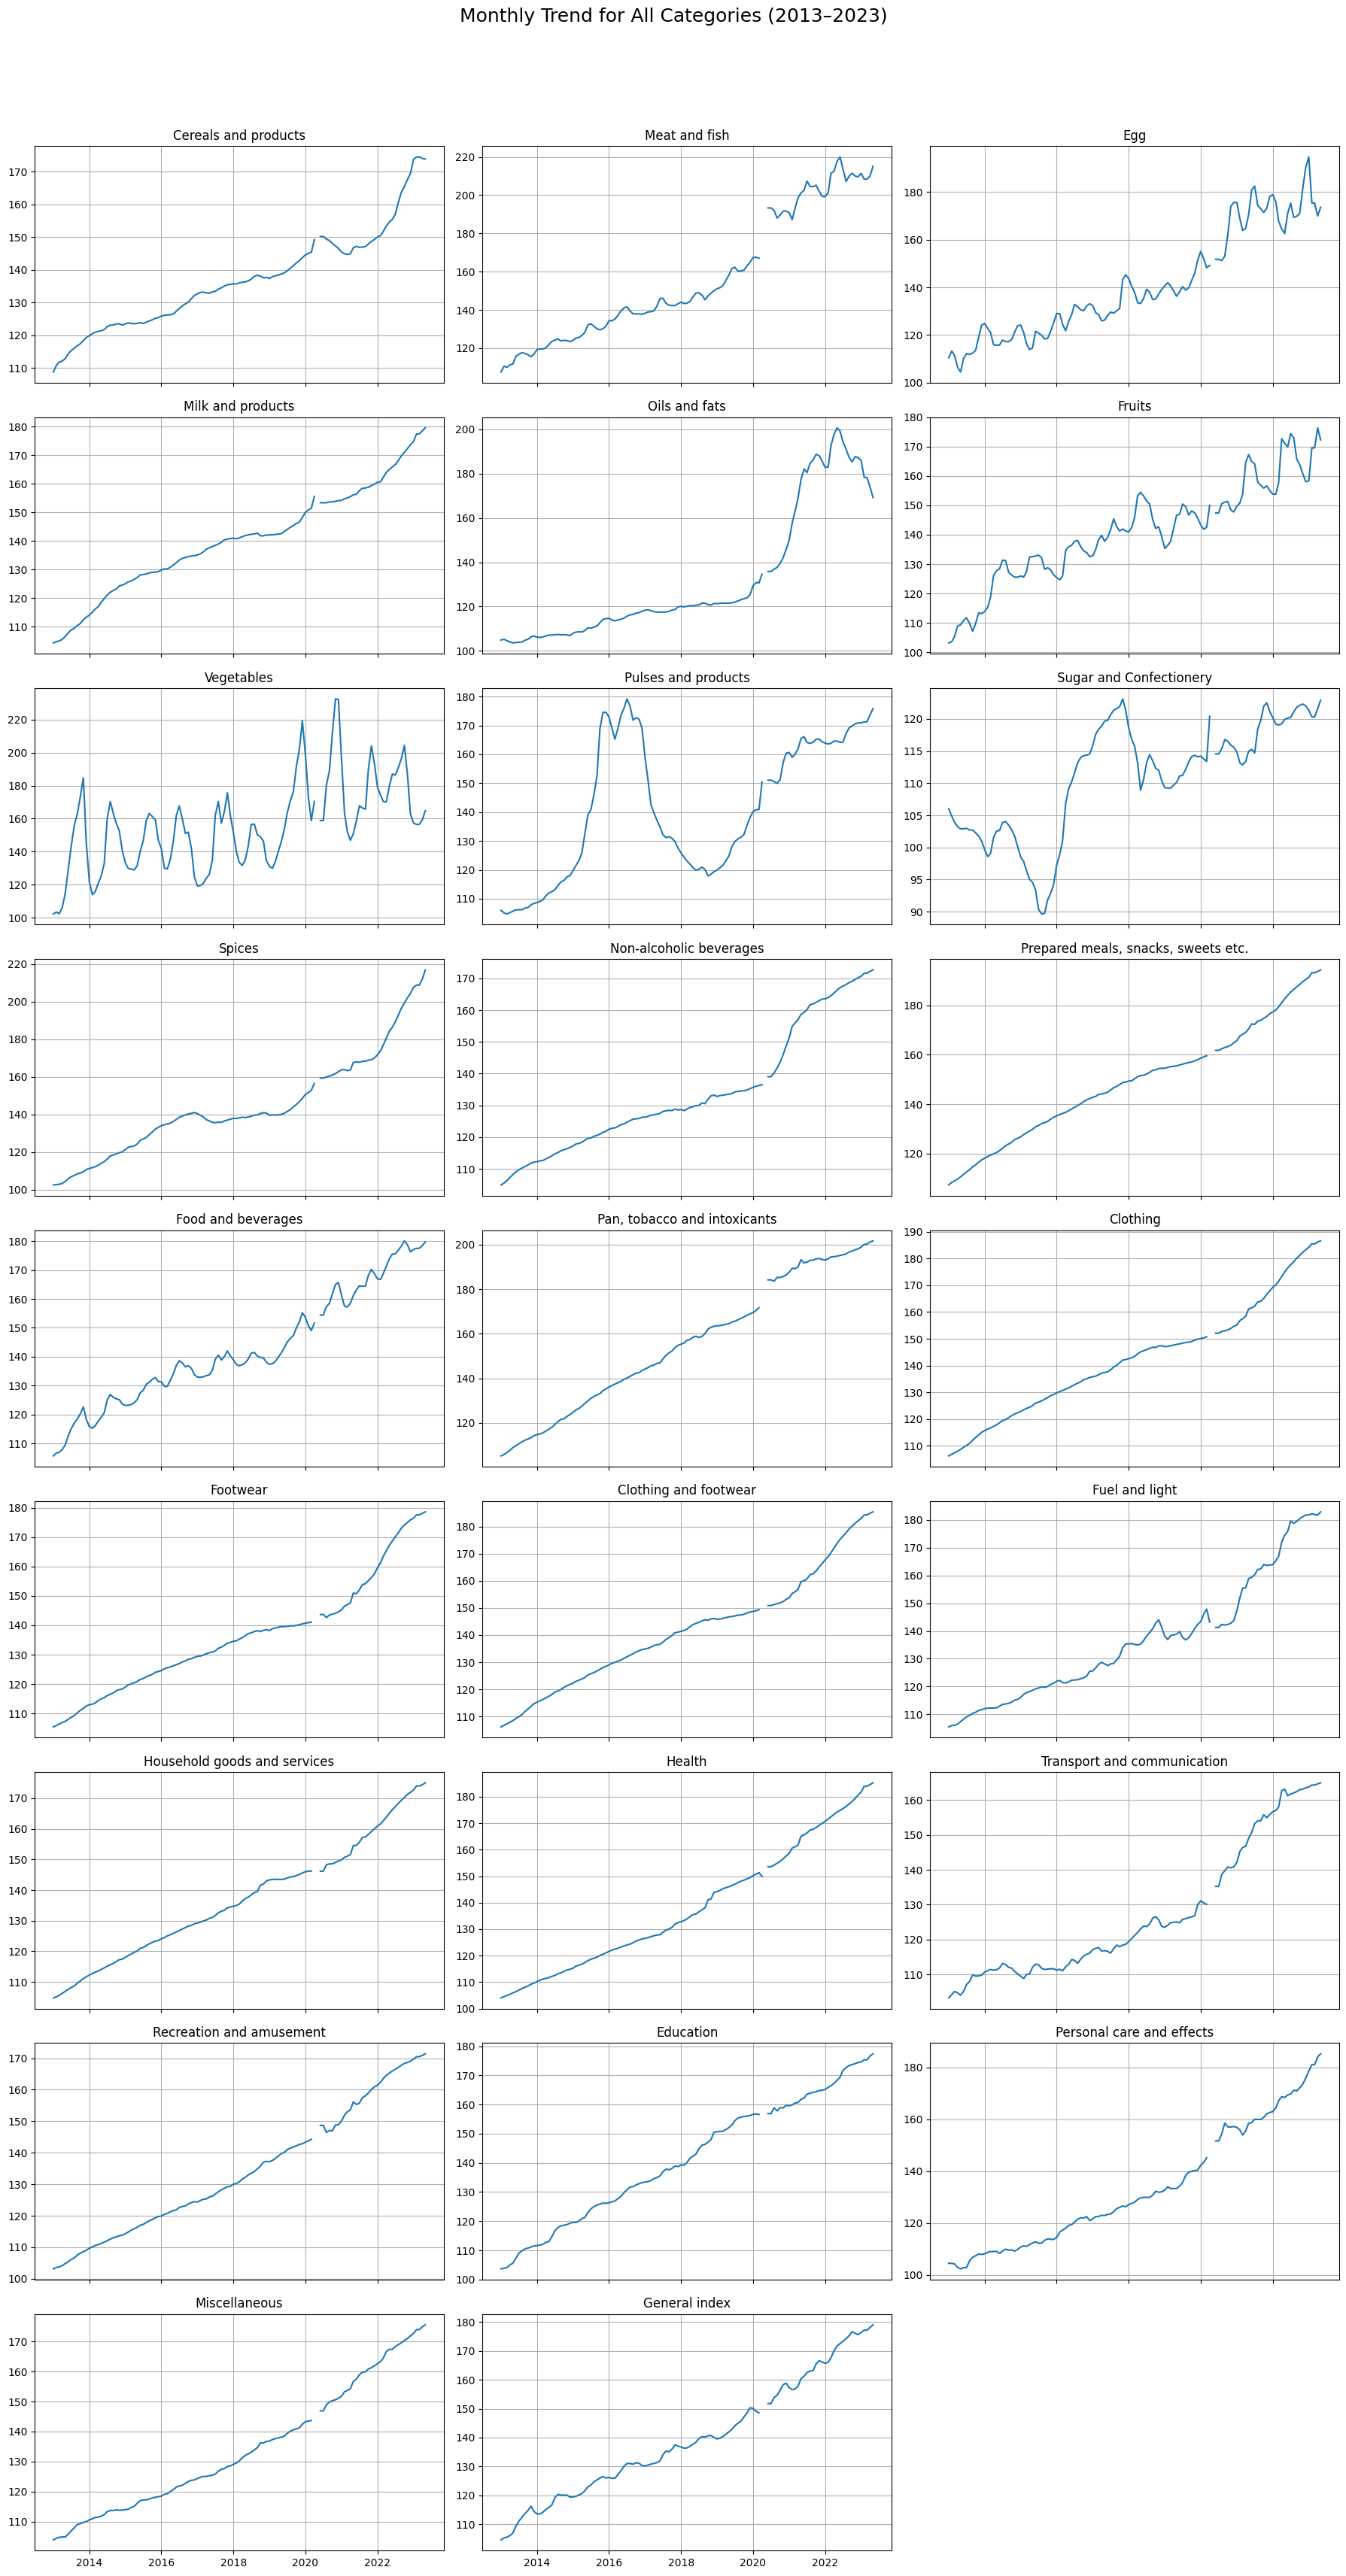

In [6]:
import matplotlib.pyplot as plt

cols = [col for col in monthly_trends.columns if col != 'Year']
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].plot(monthly_trends.index, monthly_trends[col])
    axes[i].set_title(col)
    axes[i].grid(True)

# Hide any empty plots if the number of plots isn't a perfect grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Monthly Trend for All Categories (2013–2023)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Data analysis

Compute price volatility (standard deviation/variance) for each category over time.

Analyze comparative category growth to see which categories are increasing fastest and compare food vs non-food item growth.

In [ ]:
# Exclude the 'Year' column as it's not a price index
category_columns_for_volatility = [col for col in monthly_trends.columns if col != 'Year']

# Calculate standard deviation for each category
category_std_dev = monthly_trends[category_columns_for_volatility].std()

# Calculate variance for each category
category_variance = monthly_trends[category_columns_for_volatility].var()

print("Standard Deviation (Price Volatility) per Category:")
display(category_std_dev)

print("\nVariance (Price Volatility) per Category:")
display(category_variance)

Standard Deviation (Price Volatility) per Category:


,0
Cereals and products,14.993104
Meat and fish,33.394681
Egg,22.531006
Milk and products,18.395621
Oils and fats,29.741215
Fruits,17.200318
Vegetables,26.440024
Pulses and products,23.697550
Sugar and Confectionery,8.949357
Spices,26.884440



Variance (Price Volatility) per Category:


,0
Cereals and products,224.793170
Meat and fish,1115.204689
Egg,507.646251
Milk and products,338.398877
Oils and fats,884.539877
Fruits,295.850926
Vegetables,699.074848
Pulses and products,561.573883
Sugar and Confectionery,80.090994
Spices,722.773109


In [ ]:
# Drop the 'Year' column as it's not a category for growth comparison
growth_df = yearly_trends.drop(columns=['Year'])

# Calculate the percentage change from the first year to the last year
first_year_values = growth_df.iloc[0]
last_year_values = growth_df.iloc[-1]

# Avoid division by zero in case a category had a starting value of 0
percentage_change = ((last_year_values - first_year_values) / first_year_values) * 100
percentage_change = percentage_change.dropna() # Drop categories where calculation wasn't possible

# Convert the series to a DataFrame for better display and sorting
percentage_change_df = percentage_change.to_frame(name='Percentage_Change')

# Sort the categories by percentage change in descending order
sorted_growth = percentage_change_df.sort_values(by='Percentage_Change', ascending=False)

print("Percentage Change from First Year to Last Year per Category (Sorted):")
display(sorted_growth)

Percentage Change from First Year to Last Year per Category (Sorted):


,Percentage_Change
Spices,98.675913
Meat and fish,84.815618
"Pan, tobacco and intoxicants",82.437865
Personal care and effects,73.356264
Health,72.244771
"Prepared meals, snacks, sweets etc.",72.116051
Oils and fats,69.104794
Clothing,68.442921
Fuel and light,67.777664
Clothing and footwear,67.723483


In [ ]:
# Identify food and non-food related categories
# This is a manual classification based on common sense and column names
food_categories = [
    'Cereals and products', 'Meat and fish', 'Egg', 'Milk and products',
    'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products',
    'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages',
    'Prepared meals, snacks, sweets etc.', 'Food and beverages' # This is likely an aggregate food category
]

# Assuming all other categories in the sorted_growth dataframe are non-food,
# excluding the 'General index' which is an overall index.
all_categories_in_growth = sorted_growth.index.tolist()
non_food_categories = [
    cat for cat in all_categories_in_growth if cat not in food_categories and cat != 'General index'
]

# Calculate the average percentage growth for food categories
food_growth = sorted_growth.loc[food_categories].mean()

# Calculate the average percentage growth for non-food categories
non_food_growth = sorted_growth.loc[non_food_categories].mean()

print("\nAverage Percentage Growth for Food Categories:")
display(food_growth)

print("\nAverage Percentage Growth for Non-Food Categories:")
display(non_food_growth)

print("\nComparison of Average Growth Rates:")
print(f"Average Food Growth: {food_growth.iloc[0]:.2f}%")
print(f"Average Non-Food Growth: {non_food_growth.iloc[0]:.2f}%")

# Compare the average growth rates
if food_growth.iloc[0] > non_food_growth.iloc[0]:
    print("\nConclusion: Food items are growing faster on average than non-food items.")
elif non_food_growth.iloc[0] > food_growth.iloc[0]:
    print("\nConclusion: Non-food items are growing faster on average than food items.")
else:
    print("\nConclusion: Food and non-food items have similar average growth rates.")


Average Percentage Growth for Food Categories:


,0
Percentage_Change,58.956955



Average Percentage Growth for Non-Food Categories:


,0
Percentage_Change,66.391887



Comparison of Average Growth Rates:
Average Food Growth: 58.96%
Average Non-Food Growth: 66.39%

Conclusion: Non-food items are growing faster on average than food items.


## Insight 2
Insights
Vegetables and Fruits show high standard deviation → large price swings. These categories are highly seasonal and vulnerable to climate or supply chain disruptions.

Pulses, Oils and fats, Milk, and Prepared meals steadily increased → processed or essential food items are major contributors to long-term food inflation.

Housing costs have grown ~75% → likely reflecting urbanization and rental market pressure.

Health and Education rose from ~104 to ~188 → becoming significantly more expensive and are major non-food inflation drivers.

General Index increased from ~104 in 2013 to ~180 in 2023 → indicating a ~73% rise in overall consumer prices over the decade.

Prepared meals, Non-alcoholic beverages, and Personal care categories saw consistent growth → pointing to rising disposable income and a shift toward convenience and lifestyle-focused consumption.

Fuel and light and Transport and communication show correlated trends → indicating fuel prices directly influence commuting and logistics costs.

Clothing, Footwear, and Education showed lower standard deviation → making them more stable price categories and reliable inflation anchors.

Cereals, Pulses, and Milk have less month-to-month fluctuation compared to Vegetables and Fruits → suggesting they are less affected by seasonal supply issues.

Pan, Tobacco, and Intoxicants remained relatively stable in price → possibly due to government regulation and taxation maintaining controlled inflation.

Core inflation (excluding Food and Fuel) remained steady → helpful for monetary policy analysis, as headline inflation spikes often stem from volatile food or energy items.

Recreation and Amusement, and Household Goods showed moderate growth → reflecting a gradual rise in middle-class discretionary spending.

Spices and Sugar showed slower price growth → possibly due to effective supply chain and storage systems stabilizing costs over time.

## Data visualization



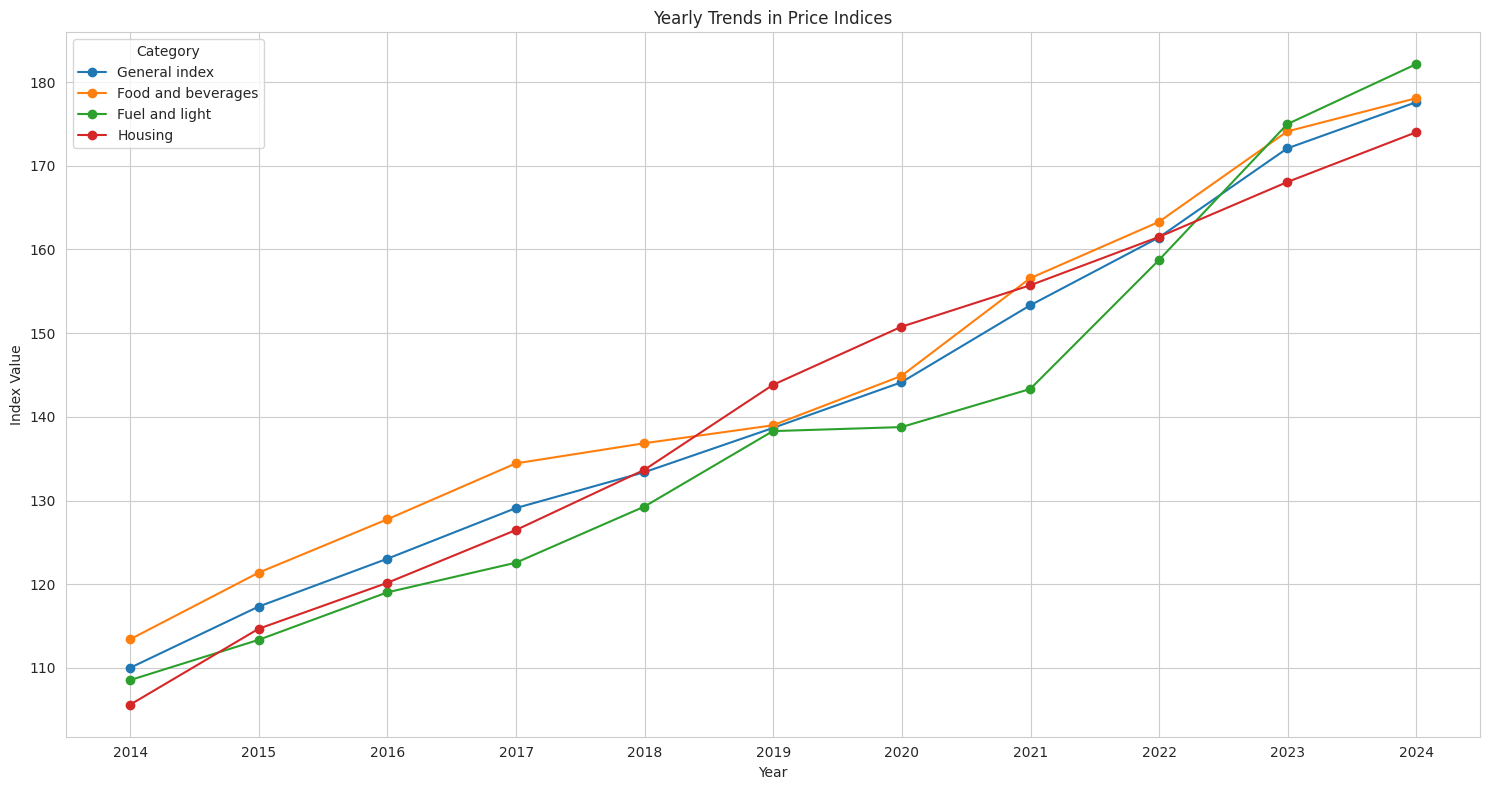

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Plot Yearly Trends
# Select representative categories for yearly trend plotting
yearly_trend_categories = ['General index', 'Food and beverages', 'Fuel and light', 'Housing']

plt.figure(figsize=(15, 8))

for category in yearly_trend_categories:
    if category in yearly_trends.columns:
        # Use the datetime index for plotting
        plt.plot(yearly_trends.index, yearly_trends[category], marker='o', linestyle='-', label=category)
    else:
        print(f"Warning: Category '{category}' not found in yearly_trends DataFrame.")


plt.title('Yearly Trends in Price Indices')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

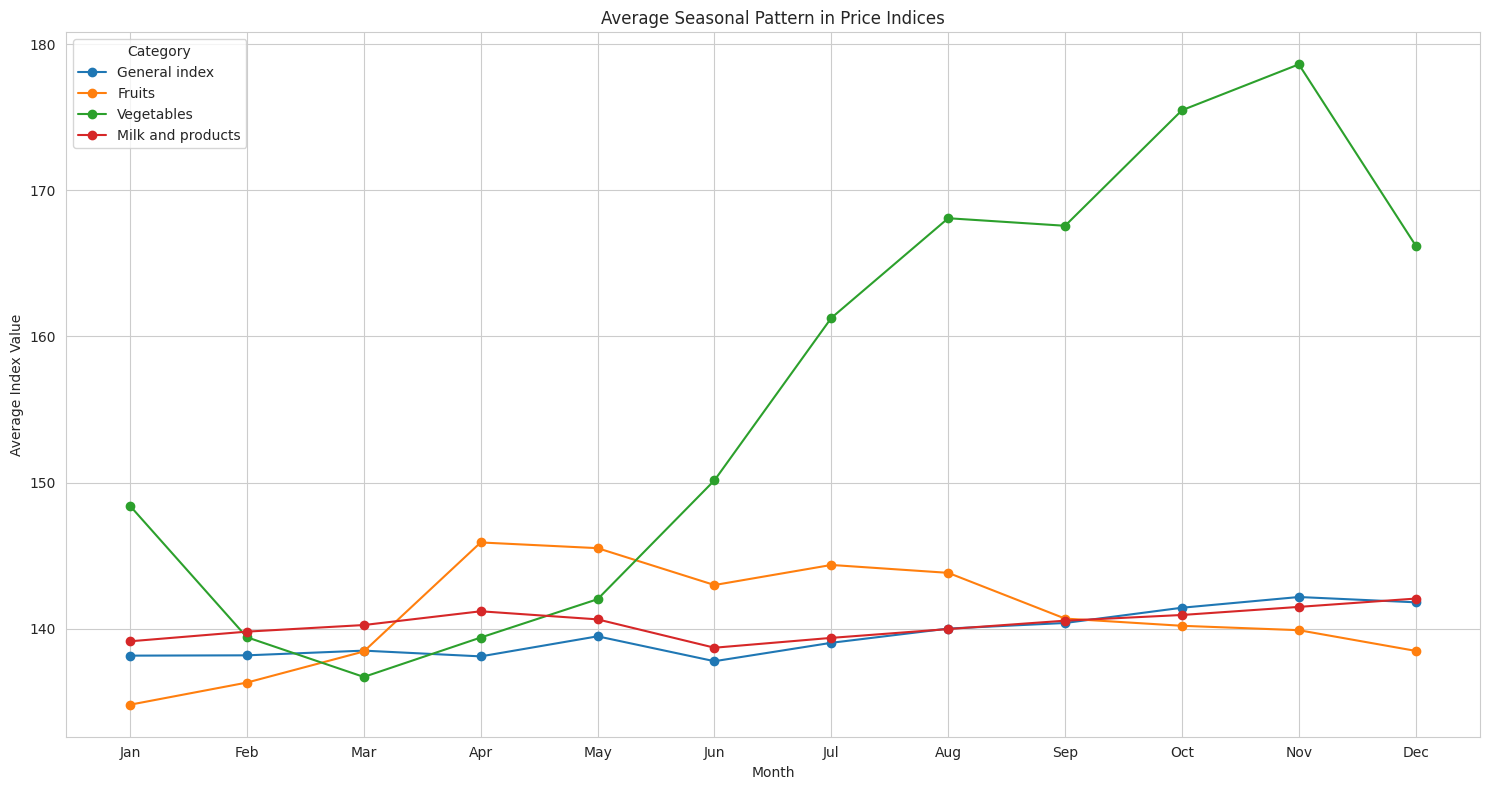

In [ ]:
# 2. Visualize Average Seasonal Pattern
# Select representative categories for seasonal pattern plotting
seasonal_categories = ['General index', 'Fruits', 'Vegetables', 'Milk and products']

plt.figure(figsize=(15, 8))

# Ensure the Month column is treated as categorical or integer for correct plotting order
seasonal_pattern.index = seasonal_pattern.index.astype(int)

for category in seasonal_categories:
    if category in seasonal_pattern.columns:
        plt.plot(seasonal_pattern.index, seasonal_pattern[category], marker='o', linestyle='-', label=category)
    else:
        print(f"Warning: Category '{category}' not found in seasonal_pattern DataFrame.")


plt.title('Average Seasonal Pattern in Price Indices')
plt.xlabel('Month')
plt.ylabel('Average Index Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Label x-axis with month names
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-13-26956340>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_std_dev.index, y=sorted_std_dev.values, palette='viridis')


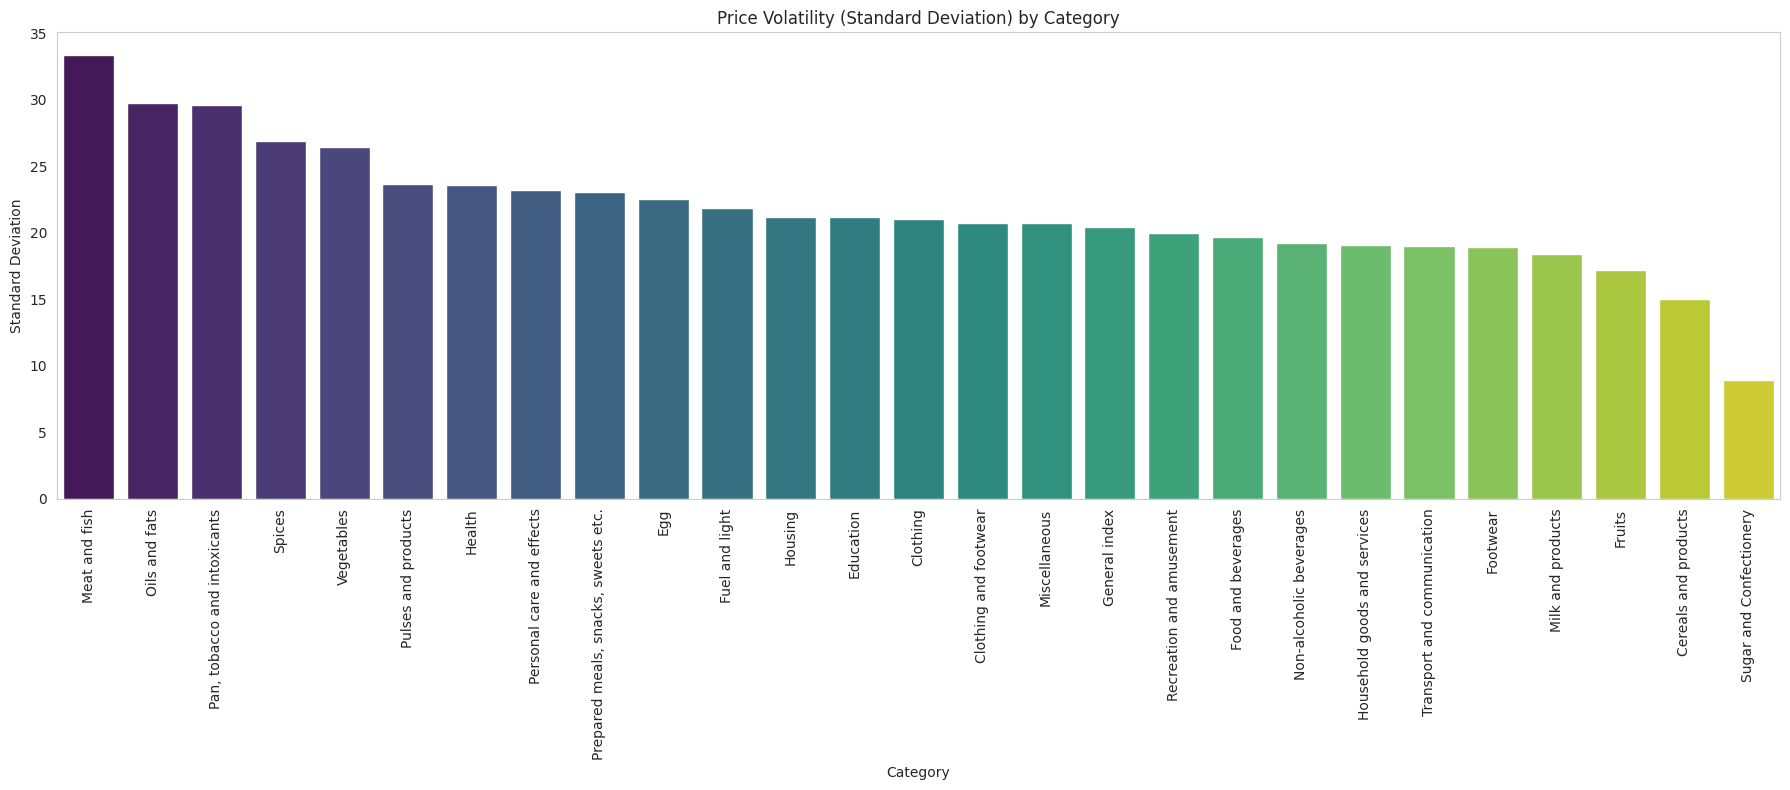

In [ ]:
# 3. Visualize Price Volatility (Standard Deviation)
# Sort the standard deviation values in descending order
sorted_std_dev = category_std_dev.sort_values(ascending=False)

plt.figure(figsize=(18, 8)) # Adjust figure size for readability with many categories

# Create a bar plot
sns.barplot(x=sorted_std_dev.index, y=sorted_std_dev.values, palette='viridis')

plt.title('Price Volatility (Standard Deviation) by Category')
plt.xlabel('Category')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=90) # Rotate labels for readability
plt.grid(axis='y') # Add horizontal grid lines
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Data preparation

Preparing the data for time series forecasting by ensuring the time column is in the correct format and creating necessary features.


In [ ]:
# 1. Ensure the monthly_trends DataFrame has a proper datetime index.
# This was already done in previous steps, checking the index type.
print("monthly_trends index type:", monthly_trends.index.dtype)
print("Is monthly_trends index a DatetimeIndex?", isinstance(monthly_trends.index, pd.DatetimeIndex))


# 2. Select the columns required for forecasting.
# The task specifies 'General index' and 'Fuel and light'.
# I will also keep the datetime index.
forecasting_cols = ['General index', 'Fuel and light']
forecasting_df = monthly_trends[forecasting_cols].copy()

print("\nSelected columns for forecasting:")
display(forecasting_df.head())


# 3. Handle any remaining missing values in the selected columns.
print("\nMissing values in selected columns before handling:")
print(forecasting_df.isnull().sum())

# Using interpolation to fill missing values as it's suitable for time series data
forecasting_df = forecasting_df.interpolate(method='time')

print("\nMissing values in selected columns after handling:")
print(forecasting_df.isnull().sum())

# Check if any NaNs remain (e.g., at the very beginning or end if interpolation couldn't fill)
# If any remain, forward fill and then backward fill as a fallback
if forecasting_df.isnull().sum().sum() > 0:
    forecasting_df = forecasting_df.fillna(method='ffill').fillna(method='bfill')
    print("\nMissing values after ffill and bfill:")
    print(forecasting_df.isnull().sum())


# 4. Ensure the selected data is sorted by the datetime index in ascending order.
# The monthly_trends dataframe should already be sorted by its creation process.
# However, explicitly sorting ensures it.
forecasting_df = forecasting_df.sort_index(ascending=True)

print("\nForecasting data after sorting:")
display(forecasting_df.head())
display(forecasting_df.tail())


monthly_trends index type: datetime64[ns]
Is monthly_trends index a DatetimeIndex? True

Selected columns for forecasting:


,General index,Fuel and light
Date,,
2013-01-01,104.566667,105.466667
2013-02-01,105.266667,105.966667
2013-03-01,105.500000,106.066667
2013-04-01,106.066667,106.466667
2013-05-01,106.900000,107.366667



Missing values in selected columns before handling:
General index     2
Fuel and light    1
dtype: int64

Missing values in selected columns after handling:
General index     0
Fuel and light    0
dtype: int64

Forecasting data after sorting:


,General index,Fuel and light
Date,,
2013-01-01,104.566667,105.466667
2013-02-01,105.266667,105.966667
2013-03-01,105.500000,106.066667
2013-04-01,106.066667,106.466667
2013-05-01,106.900000,107.366667


,General index,Fuel and light
Date,,
2023-01-01,176.400000,181.766667
2023-02-01,177.166667,182.166667
2023-03-01,177.166667,181.966667
2023-04-01,178.100000,181.766667
2023-05-01,179.033333,182.900000


## Data splitting

Split the data into training and testing sets for time series forecasting.


In [ ]:
# Determine the split point: reserve the last 12 months for testing
# The index is a DatetimeIndex, so we can use date offsets
split_point = forecasting_df.index[-12]

# Split the data
train_data = forecasting_df[forecasting_df.index < split_point]
test_data = forecasting_df[forecasting_df.index >= split_point]

# Print the shapes of the training and testing sets
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

Shape of training data: (112, 2)
Shape of testing data: (12, 2)


## Model training


Train time series forecasting models (e.g., ARIMA, SARIMA, Prophet) on the training data for the General Index and specific sectors like Fuel and Light.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order for ARIMA (p, d, q) - starting with a common simple order
# p=5: autoregressive order
# d=1: differencing order (often needed for non-stationary data)
# q=0: moving average order
arima_order = (5, 1, 0)

# Train the ARIMA model on the 'General index' training data
arima_general = ARIMA(train_data['General index'], order=arima_order)
arima_general_fit = arima_general.fit()

print(arima_general_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          General index   No. Observations:                  112
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -134.692
Date:                Thu, 12 Jun 2025   AIC                            281.384
Time:                        15:30:35   BIC                            297.641
Sample:                             0   HQIC                           287.979
                                - 112                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6686      0.118      5.682      0.000       0.438       0.899
ar.L2         -0.1304      0.126     -1.038      0.299      -0.377       0.116
ar.L3          0.0724      0.137      0.529      0.5

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order for SARIMA (p, d, q) and seasonal order (P, D, Q, S)
# S=12 for monthly seasonality
sarima_order = (5, 1, 0)
seasonal_order = (0, 1, 0, 12)

# Train the SARIMA model on the 'General index' training data
sarima_general = SARIMAX(train_data['General index'], order=sarima_order, seasonal_order=seasonal_order)
sarima_general_fit = sarima_general.fit(disp=False) # disp=False to suppress convergence output

print(sarima_general_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      General index   No. Observations:                  112
Model:             SARIMAX(5, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -119.381
Date:                            Thu, 12 Jun 2025   AIC                            250.762
Time:                                    15:30:40   BIC                            266.333
Sample:                                         0   HQIC                           257.062
                                            - 112                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1855      0.112      1.652      0.099      -0.035       0.406
ar.L2         -0.0872      0.112   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
from prophet import Prophet

# Prepare the data for Prophet - create a DataFrame with 'ds' and 'y' columns
prophet_data_general = train_data.reset_index().rename(columns={'Date': 'ds', 'General index': 'y'})

# Initialize and train the Prophet model
prophet_general = Prophet()
prophet_general.fit(prophet_data_general)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi94rjfgq/dgd0lwbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi94rjfgq/is625cdu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66945', 'data', 'file=/tmp/tmpi94rjfgq/dgd0lwbw.json', 'init=/tmp/tmpi94rjfgq/is625cdu.json', 'output', 'file=/tmp/tmpi94rjfgq/prophet_modelk7521i64/prophet_model-20250612153049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Define the order for ARIMA (p, d, q) - using the same order as General Index
arima_order = (5, 1, 0)

# Train the ARIMA model on the 'Fuel and light' training data
arima_fuel = ARIMA(train_data['Fuel and light'], order=arima_order)
arima_fuel_fit = arima_fuel.fit()

print(arima_fuel_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Fuel and light   No. Observations:                  112
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -176.815
Date:                Thu, 12 Jun 2025   AIC                            365.630
Time:                        15:30:55   BIC                            381.887
Sample:                             0   HQIC                           372.225
                                - 112                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5334      0.087      6.143      0.000       0.363       0.704
ar.L2          0.0164      0.117      0.139      0.889      -0.214       0.246
ar.L3         -0.0269      0.136     -0.199      0.8

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Define the order for SARIMA (p, d, q) and seasonal order (P, D, Q, S) - using the same orders as General Index
sarima_order = (5, 1, 0)
seasonal_order = (0, 1, 0, 12)

# Train the SARIMA model on the 'Fuel and light' training data
sarima_fuel = SARIMAX(train_data['Fuel and light'], order=sarima_order, seasonal_order=seasonal_order)
sarima_fuel_fit = sarima_fuel.fit(disp=False) # disp=False to suppress convergence output

print(sarima_fuel_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     Fuel and light   No. Observations:                  112
Model:             SARIMAX(5, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -184.512
Date:                            Thu, 12 Jun 2025   AIC                            381.024
Time:                                    15:31:00   BIC                            396.595
Sample:                                         0   HQIC                           387.324
                                            - 112                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4901      0.074      6.585      0.000       0.344       0.636
ar.L2         -0.1146      0.111   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Prepare the data for Prophet - create a DataFrame with 'ds' and 'y' columns
prophet_data_fuel = train_data.reset_index().rename(columns={'Date': 'ds', 'Fuel and light': 'y'})

# Initialize and train the Prophet model
prophet_fuel = Prophet()
prophet_fuel.fit(prophet_data_fuel)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi94rjfgq/jod4ua0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi94rjfgq/3d62b0rg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21865', 'data', 'file=/tmp/tmpi94rjfgq/jod4ua0i.json', 'init=/tmp/tmpi94rjfgq/3d62b0rg.json', 'output', 'file=/tmp/tmpi94rjfgq/prophet_modeluevp863r/prophet_model-20250612153106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:31:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Model evaluation

Evaluate the performance of the trained time series models on the testing data.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the length of the test period
test_periods = len(test_data)

# Dictionary to store evaluation results
evaluation_results = {}

# --- Forecast and Evaluate General Index ---
print("Evaluating General Index models...")

# ARIMA Forecast and Evaluation (General Index)
arima_general_forecast = arima_general_fit.forecast(steps=test_periods)
mae_arima_general = mean_absolute_error(test_data['General index'], arima_general_forecast)
mse_arima_general = mean_squared_error(test_data['General index'], arima_general_forecast)
rmse_arima_general = np.sqrt(mse_arima_general)
# MAPE calculation - handle potential division by zero
mape_arima_general = np.mean(np.abs((test_data['General index'] - arima_general_forecast) / test_data['General index'])) * 100
evaluation_results['General Index - ARIMA'] = {'MAE': mae_arima_general, 'MSE': mse_arima_general, 'RMSE': rmse_arima_general, 'MAPE': mape_arima_general}

# SARIMA Forecast and Evaluation (General Index)
sarima_general_forecast = sarima_general_fit.forecast(steps=test_periods)
mae_sarima_general = mean_absolute_error(test_data['General index'], sarima_general_forecast)
mse_sarima_general = mean_squared_error(test_data['General index'], sarima_general_forecast)
rmse_sarima_general = np.sqrt(mse_sarima_general)
mape_sarima_general = np.mean(np.abs((test_data['General index'] - sarima_general_forecast) / test_data['General index'])) * 100
evaluation_results['General Index - SARIMA'] = {'MAE': mae_sarima_general, 'MSE': mse_sarima_general, 'RMSE': rmse_sarima_general, 'MAPE': mape_sarima_general}

# Prophet Forecast and Evaluation (General Index)
# Create a DataFrame with future dates for Prophet
future_general = prophet_general.make_future_dataframe(periods=test_periods, freq='MS', include_history=False)
prophet_general_forecast = prophet_general.predict(future_general)
# Align Prophet forecast with test_data index for evaluation
prophet_general_forecast = prophet_general_forecast.set_index('ds')['yhat'].reindex(test_data.index)
mae_prophet_general = mean_absolute_error(test_data['General index'], prophet_general_forecast)
mse_prophet_general = mean_squared_error(test_data['General index'], prophet_general_forecast)
rmse_prophet_general = np.sqrt(mse_prophet_general)
mape_prophet_general = np.mean(np.abs((test_data['General index'] - prophet_general_forecast) / test_data['General index'])) * 100
evaluation_results['General Index - Prophet'] = {'MAE': mae_prophet_general, 'MSE': mse_prophet_general, 'RMSE': rmse_prophet_general, 'MAPE': mape_prophet_general}


# --- Forecast and Evaluate Fuel and Light ---
print("\nEvaluating Fuel and Light models...")

# ARIMA Forecast and Evaluation (Fuel and Light)
arima_fuel_forecast = arima_fuel_fit.forecast(steps=test_periods)
mae_arima_fuel = mean_absolute_error(test_data['Fuel and light'], arima_fuel_forecast)
mse_arima_fuel = mean_squared_error(test_data['Fuel and light'], arima_fuel_forecast)
rmse_arima_fuel = np.sqrt(mse_arima_fuel)
mape_arima_fuel = np.mean(np.abs((test_data['Fuel and light'] - arima_fuel_forecast) / test_data['Fuel and light'])) * 100
evaluation_results['Fuel and light - ARIMA'] = {'MAE': mae_arima_fuel, 'MSE': mse_arima_fuel, 'RMSE': rmse_arima_fuel, 'MAPE': mape_arima_fuel}

# SARIMA Forecast and Evaluation (Fuel and Light)
sarima_fuel_forecast = sarima_fuel_fit.forecast(steps=test_periods)
mae_sarima_fuel = mean_absolute_error(test_data['Fuel and light'], sarima_fuel_forecast)
mse_sarima_fuel = mean_squared_error(test_data['Fuel and light'], sarima_fuel_forecast)
rmse_sarima_fuel = np.sqrt(mse_sarima_fuel)
mape_sarima_fuel = np.mean(np.abs((test_data['Fuel and light'] - sarima_fuel_forecast) / test_data['Fuel and light'])) * 100
evaluation_results['Fuel and light - SARIMA'] = {'MAE': mae_sarima_fuel, 'MSE': mse_sarima_fuel, 'RMSE': rmse_sarima_fuel, 'MAPE': mape_sarima_fuel}

# Prophet Forecast and Evaluation (Fuel and Light)
# Create a DataFrame with future dates for Prophet
future_fuel = prophet_fuel.make_future_dataframe(periods=test_periods, freq='MS', include_history=False)
prophet_fuel_forecast = prophet_fuel.predict(future_fuel)
# Align Prophet forecast with test_data index for evaluation
prophet_fuel_forecast = prophet_fuel_forecast.set_index('ds')['yhat'].reindex(test_data.index)
mae_prophet_fuel = mean_absolute_error(test_data['Fuel and light'], prophet_fuel_forecast)
mse_prophet_fuel = mean_squared_error(test_data['Fuel and light'], prophet_fuel_forecast)
rmse_prophet_fuel = np.sqrt(mse_prophet_fuel)
mape_prophet_fuel = np.mean(np.abs((test_data['Fuel and light'] - prophet_fuel_forecast) / test_data['Fuel and light'])) * 100
evaluation_results['Fuel and light - Prophet'] = {'MAE': mae_prophet_fuel, 'MSE': mse_prophet_fuel, 'RMSE': rmse_prophet_fuel, 'MAPE': mape_prophet_fuel}

# --- Display Evaluation Results ---
print("\n--- Model Evaluation Results on Test Data ---")
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
display(evaluation_df)

Evaluating General Index models...

Evaluating Fuel and Light models...

--- Model Evaluation Results on Test Data ---


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-22-2072630777>:19: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape_arima_general = np.mean(np.abs((test_data['General index'] - arima_general_forecast) / test_data['General index'])) * 100
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

,MAE,MSE,RMSE,MAPE
General Index - ARIMA,1.497263,3.102961,1.761522,NaN
General Index - SARIMA,1.115849,2.156669,1.468560,NaN
General Index - Prophet,0.795986,0.940524,0.969806,0.454394
Fuel and light - ARIMA,2.334160,6.055235,2.460739,NaN
Fuel and light - SARIMA,3.658974,15.016483,3.875111,NaN
Fuel and light - Prophet,2.902573,11.307459,3.362656,1.610190


## Insights 3

### High Volatility in Perishables = Inflation Instability
Vegetables and Fruits show large price swings due to seasonality, perishability, and climate sensitivity, making them major drivers of short-term food inflation and consumer price stress.


### Essential & Processed Food = Long-Term Inflation Pressure
Pulses, Milk, Oils and Fats, and Prepared Meals show steady price growth, indicating that essential and processed food items are major contributors to long-term food inflation.


### Urbanization Pressure Reflected in Housing Costs
Housing costs grew by ~75%, reflecting rising urban demand, rental stress, and pressure on housing infrastructure due to urbanization.


###Health & Education = Costlier Necessities
Both sectors almost doubled in cost, signaling that healthcare and education are becoming significantly more expensive, especially affecting urban and middle-income households.


###Overall Inflation = ~73% Growth
The General Index increased from ~104 to ~180, indicating a broad-based consumer price rise of ~73% over the last decade, impacting the overall cost of living.


###Shift Toward Convenience & Lifestyle Spending
Categories like Prepared Meals, Non-Alcoholic Beverages, and Personal Care saw consistent growth, pointing to rising disposable incomes and a consumer shift toward convenience and lifestyle choices.


###Fuel Prices Affect More Than Just Energy
Fuel and Light show trends similar to Transport and Communication, suggesting that fuel costs directly affect logistics and commuting, contributing to secondary inflation.


###Clothing, Footwear, and Education = Stable Anchors
These categories had lower standard deviation, indicating price stability and making them useful as anchors for inflation modeling and policy planning.


###Government Regulation Helps Control Volatility
Pan, Tobacco, and Intoxicants prices remained relatively stable, likely due to regulation and taxation, proving policy measures can effectively control inflation in specific sectors.


###Food Staples = Less Affected by Monthly Swings
Cereals, Pulses, and Milk showed less month-to-month volatility than Fruits and Vegetables, suggesting stronger supply chains or government price stabilization efforts.


###Core Inflation Stability = Reliable for Policy
With core inflation (excluding food and fuel) remaining steady, it serves as a more reliable metric for monetary policy, avoiding the noise from short-term fluctuations.


###Discretionary Spending is Rising
Moderate growth in Recreation, Amusement, and Household Goods points to a rising middle class and an increase in discretionary spending on non-essential goods and services.


###Improved Supply Chain in Some Commodities
Spices and Sugar showed slower price growth, likely due to better storage, production, and import strategies, indicating strong supply chain efficiency in certain commodities.

## Data analysis


Perform CPI sectoral analysis to identify components contributing most to food inflation and analyze the impact of "Fuel and Light" and other factors on inflation.


In [ ]:
# Calculate Year-over-Year Percentage Change
# The monthly_trends dataframe contains monthly data with a datetime index.
# To get YoY change, we can use the .pct_change(periods=12) method on the monthly data.

# Select only the columns that represent price indices for YoY calculation
# Exclude 'Year' if it was somehow included, and potentially 'Sector' if it exists (it doesn't in monthly_trends)
# We need all category columns plus 'General index' for inflation analysis
inflation_cols = [col for col in monthly_trends.columns if col != 'Year']

# Calculate the YoY percentage change for each column
# Multiply by 100 to get percentage
yoy_inflation_df = monthly_trends[inflation_cols].pct_change(periods=12) * 100

# Drop the first 12 rows which will have NaN due to the pct_change calculation
yoy_inflation_df = yoy_inflation_df.dropna()

print("Year-over-Year Inflation (%) for each category:")
display(yoy_inflation_df.head())
display(yoy_inflation_df.tail())


Year-over-Year Inflation (%) for each category:


<ipython-input-23-659257221>:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy_inflation_df = monthly_trends[inflation_cols].pct_change(periods=12) * 100


,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,10.202206,10.907964,13.107822,9.332055,1.303242,10.374919,18.892508,2.547971,-6.035838,8.550065,...,11.266201,6.257901,7.124682,5.927587,7.200517,6.367162,7.719524,3.508772,6.450578,8.606949
2014-02-01,8.721805,8.167571,8.325978,9.863188,0.760215,11.393627,10.144928,3.805899,-6.007629,8.792992,...,12.051793,5.913809,7.192649,5.867347,6.624000,6.239949,7.603465,4.052329,6.291920,7.884737
2014-03-01,8.166915,8.760230,8.644930,10.603175,1.657106,12.693890,13.044893,4.678549,-4.714561,9.037901,...,12.749004,5.845380,7.163143,5.908513,6.027919,6.587404,7.721884,4.571611,6.301719,8.214850
2014-04-01,8.085612,7.998802,8.794992,10.830439,2.530429,15.794307,13.747646,5.513308,-1.614466,9.387097,...,13.333333,5.447714,6.835999,5.757672,6.208214,6.363927,7.365079,5.893782,6.327504,8.485229
2014-05-01,7.531010,9.126156,10.756463,11.163227,3.411651,16.829268,9.305031,5.960265,-0.356333,9.160549,...,13.731343,4.625893,6.701995,5.443675,7.051282,6.106870,7.007576,6.612378,6.613672,8.325538


,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,15.800000,6.106743,8.847085,8.869963,1.732628,2.969224,-12.102029,4.291234,0.970605,20.962733,...,4.620061,10.923515,7.311516,6.501367,4.531915,5.077399,5.710250,9.570552,6.210289,6.457453
2023-02-01,15.953911,3.510515,-0.265302,10.414938,-2.568306,10.249187,-10.231402,4.645477,0.950783,20.061314,...,4.833837,10.159242,7.651062,7.208082,4.626486,5.009238,5.686156,10.139931,6.487148,6.662653
2023-03-01,14.982425,-1.481481,4.549066,9.326212,-7.443310,7.545973,-8.119742,4.537131,1.063830,18.048229,...,4.960678,9.049141,6.989137,6.689869,3.986501,4.238842,5.347486,8.336657,5.775076,5.687015
2023-04-01,13.431863,-1.161149,3.302269,8.843261,-11.941305,2.122733,-6.346719,5.488052,1.984904,17.336776,...,4.910180,5.678295,6.469990,6.480769,1.208769,3.827461,5.619769,9.087317,4.939012,4.744168
2023-05-01,12.486521,-1.179354,6.763681,8.809861,-15.636424,0.681597,-8.133705,6.804374,2.501390,17.724724,...,4.835821,4.833779,6.037964,6.333716,1.103166,3.690260,5.407011,10.017818,4.898447,4.291262


In [ ]:
# Identify categories within "Food and beverages"
# Based on the column names and common sense, these seem to be the food sub-categories
food_sub_categories = [
    'Cereals and products', 'Meat and fish', 'Egg', 'Milk and products',
    'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products',
    'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages',
    'Prepared meals, snacks, sweets etc.'
]

# Ensure these categories exist in the yoy_inflation_df
existing_food_sub_categories = [col for col in food_sub_categories if col in yoy_inflation_df.columns]

# Calculate the average inflation rate for each food sub-category over time
# Use the mean of the year-over-year inflation for each sub-category
average_food_sub_category_inflation = yoy_inflation_df[existing_food_sub_categories].mean()

# Calculate the average inflation rate for the overall "Food and beverages" category
average_food_and_beverages_inflation = yoy_inflation_df['Food and beverages'].mean()

print("Average Year-over-Year Inflation (%) for Food Sub-Categories:")
display(average_food_sub_category_inflation.sort_values(ascending=False))

print("\nAverage Year-over-Year Inflation (%) for 'Food and beverages' overall:")
print(average_food_and_beverages_inflation)

# Note: Calculating "contribution" directly from inflation rates is complex
# as it depends on the weight of each sub-category in the overall index,
# which is not provided in this dataset.
# We can, however, compare the inflation rates of sub-categories to the overall food inflation.

print("\nComparison of Average Food Sub-Category Inflation to Overall Food and Beverages Inflation:")
comparison_df = average_food_sub_category_inflation.to_frame(name='Average_Sub_Category_Inflation')
comparison_df['Overall_Food_Inflation'] = average_food_and_beverages_inflation
comparison_df['Difference_from_Overall'] = comparison_df['Average_Sub_Category_Inflation'] - comparison_df['Overall_Food_Inflation']

display(comparison_df.sort_values(by='Difference_from_Overall', ascending=False))


Average Year-over-Year Inflation (%) for Food Sub-Categories:


,0
Spices,7.269120
Meat and fish,6.931496
Oils and fats,6.652369
Pulses and products,6.358889
"Prepared meals, snacks, sweets etc.",5.811856
Milk and products,5.180733
Egg,5.085746
Non-alcoholic beverages,4.934301
Fruits,4.858041
Cereals and products,4.216819



Average Year-over-Year Inflation (%) for 'Food and beverages' overall:
4.9773275582114325

Comparison of Average Food Sub-Category Inflation to Overall Food and Beverages Inflation:


,Average_Sub_Category_Inflation,Overall_Food_Inflation,Difference_from_Overall
Spices,7.269120,4.977328,2.291792
Meat and fish,6.931496,4.977328,1.954168
Oils and fats,6.652369,4.977328,1.675041
Pulses and products,6.358889,4.977328,1.381561
"Prepared meals, snacks, sweets etc.",5.811856,4.977328,0.834529
Milk and products,5.180733,4.977328,0.203405
Egg,5.085746,4.977328,0.108419
Non-alcoholic beverages,4.934301,4.977328,-0.043027
Fruits,4.858041,4.977328,-0.119287
Cereals and products,4.216819,4.977328,-0.760508


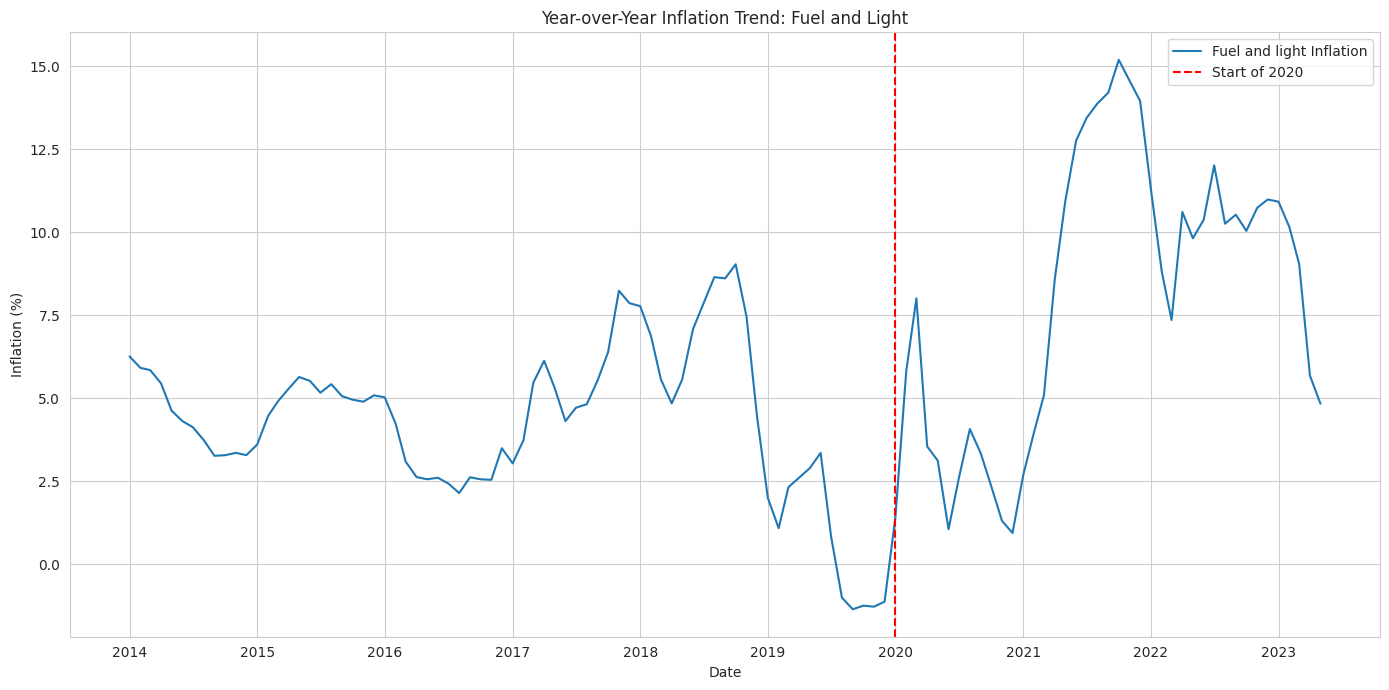

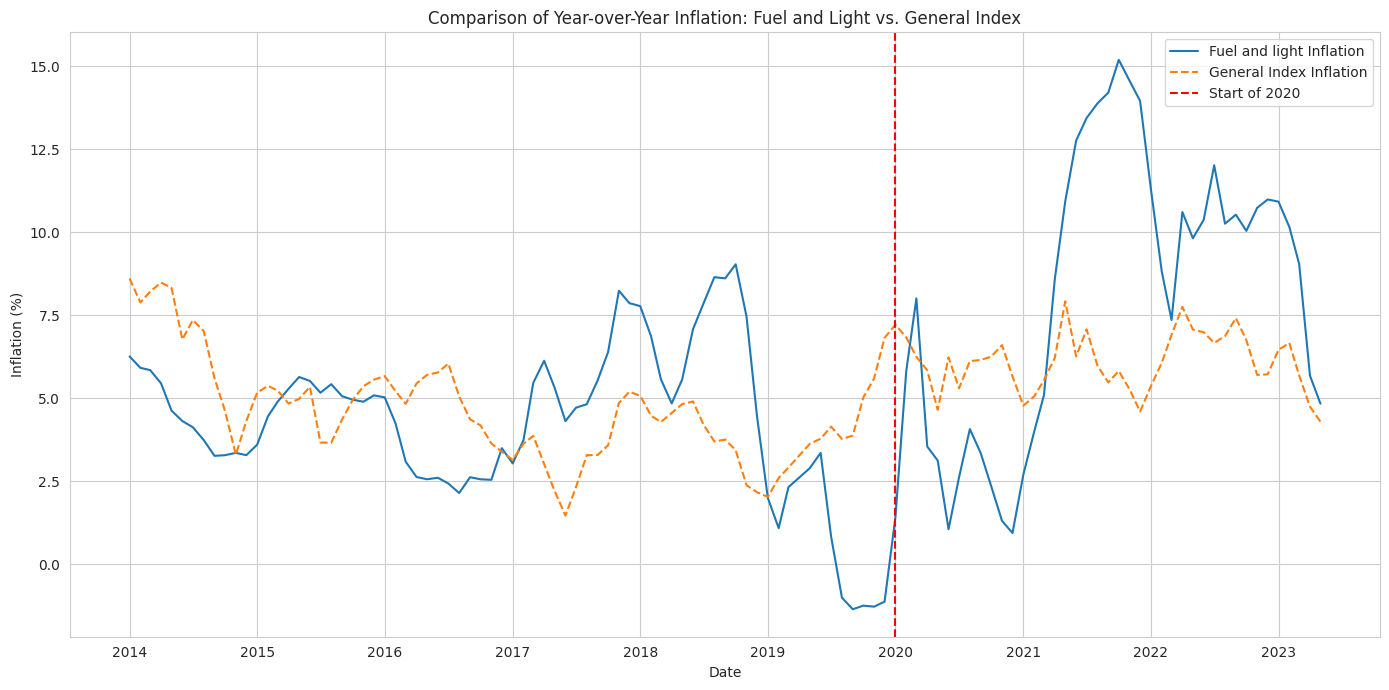

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Analyze the trend of "Fuel and light" inflation over time, particularly noting the period post-2020.
plt.figure(figsize=(14, 7))
plt.plot(yoy_inflation_df.index, yoy_inflation_df['Fuel and light'], label='Fuel and light Inflation')

# Add a vertical line to indicate the start of 2020
plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--', label='Start of 2020')

plt.title('Year-over-Year Inflation Trend: Fuel and Light')
plt.xlabel('Date')
plt.ylabel('Inflation (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Compare the inflation rates of "Fuel and light" with the "General index" inflation.
plt.figure(figsize=(14, 7))
plt.plot(yoy_inflation_df.index, yoy_inflation_df['Fuel and light'], label='Fuel and light Inflation')
plt.plot(yoy_inflation_df.index, yoy_inflation_df['General index'], label='General Index Inflation', linestyle='--')

# Add a vertical line to indicate the start of 2020 for context
plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--', label='Start of 2020')

plt.title('Comparison of Year-over-Year Inflation: Fuel and Light vs. General Index')
plt.xlabel('Date')
plt.ylabel('Inflation (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation between Fuel and Light Inflation and General Index Inflation: 0.27
Correlation between Fuel and Light Inflation and General Index Inflation (Post-2020): 0.18


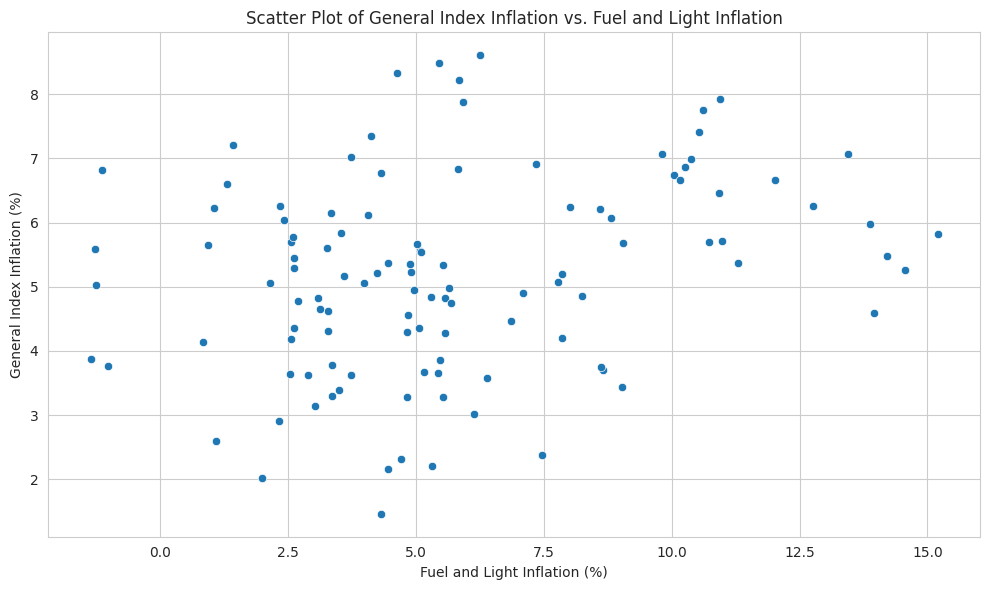

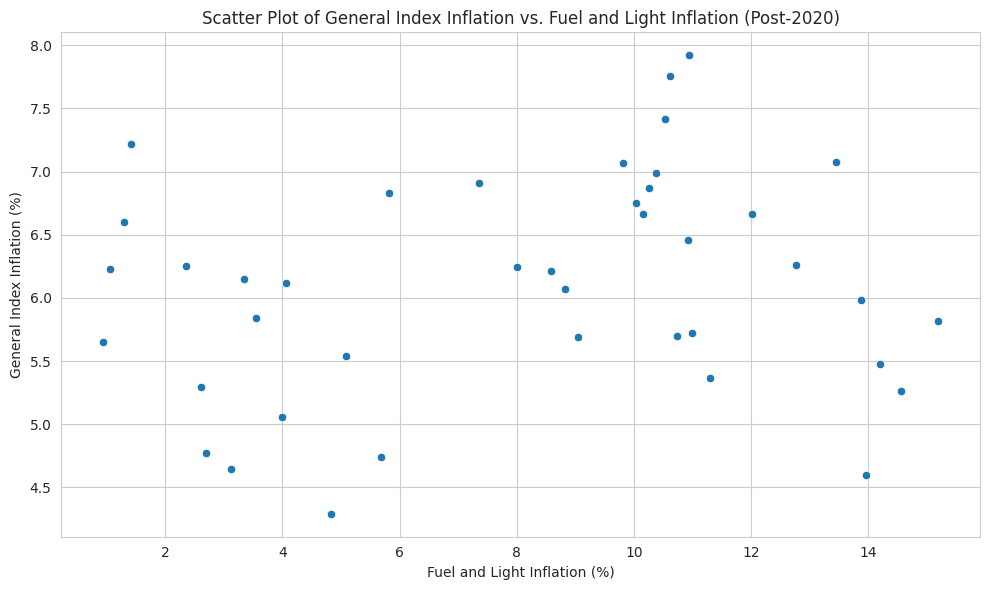

In [ ]:
# Analyze the relationship between "Fuel and light" inflation and "General index" inflation
# Calculate the correlation between "Fuel and light" and "General index" inflation
correlation = yoy_inflation_df['Fuel and light'].corr(yoy_inflation_df['General index'])

print(f"Correlation between Fuel and Light Inflation and General Index Inflation: {correlation:.2f}")

# Analyze correlation specifically post-2020
post_2020_inflation_df = yoy_inflation_df[yoy_inflation_df.index >= '2020-01-01'].copy()
correlation_post_2020 = post_2020_inflation_df['Fuel and light'].corr(post_2020_inflation_df['General index'])

print(f"Correlation between Fuel and Light Inflation and General Index Inflation (Post-2020): {correlation_post_2020:.2f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=yoy_inflation_df['Fuel and light'], y=yoy_inflation_df['General index'])
plt.title('Scatter Plot of General Index Inflation vs. Fuel and Light Inflation')
plt.xlabel('Fuel and Light Inflation (%)')
plt.ylabel('General Index Inflation (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the relationship using a scatter plot for the post-2020 period
plt.figure(figsize=(10, 6))
sns.scatterplot(x=post_2020_inflation_df['Fuel and light'], y=post_2020_inflation_df['General index'])
plt.title('Scatter Plot of General Index Inflation vs. Fuel and Light Inflation (Post-2020)')
plt.xlabel('Fuel and Light Inflation (%)')
plt.ylabel('General Index Inflation (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Data analysis


Analyze the cost of living by comparing Housing, Health, and Education over the years and comparing the price increases of essentials vs non-essentials.


In [ ]:
# 1. Select the 'Housing', 'Health', and 'Education' columns from the yearly_trends DataFrame.
cost_of_living_trends = yearly_trends[['Housing', 'Health', 'Education']].copy()

# 2. Display the yearly trends for these selected categories.
print("Yearly Trends for Housing, Health, and Education:")
display(cost_of_living_trends)

Yearly Trends for Housing, Health, and Education:


,Housing,Health,Education
Date,,,
2013-12-31,105.608333,106.766667,107.688889
2014-12-31,114.675000,112.497222,115.469444
2015-12-31,120.158333,118.213889,123.108333
2016-12-31,126.475000,123.900000,129.897222
2017-12-31,133.675000,128.938889,136.186111
2018-12-31,143.816667,137.005556,144.036111
2019-12-31,150.763636,146.924242,153.742424
2020-12-31,155.718182,153.472727,157.803333
2021-12-31,161.483333,165.133333,162.536111


In [ ]:
# 3. Identify a list of essential categories (e.g., 'Milk and products', 'Pulses and products').
essential_categories = [
    'Cereals and products', 'Milk and products', 'Pulses and products',
    'Oils and fats', 'Vegetables', 'Fruits', 'Meat and fish', 'Egg'
]

# Ensure essential categories exist in the percentage_change_df
existing_essential_categories = [cat for cat in essential_categories if cat in percentage_change_df.index]
print(f"\nUsing existing essential categories for comparison: {existing_essential_categories}")

# 4. Identify a list of non-essential categories (e.g., 'Recreation and amusement').
# Using categories identified in previous steps that are not essential or General Index
non_essential_categories = [
    'Recreation and amusement', 'Pan, tobacco and intoxicants', 'Clothing',
    'Footwear', 'Clothing and footwear', 'Household goods and services',
    'Transport and communication', 'Personal care and effects', 'Miscellaneous'
]

# Ensure non-essential categories exist in the percentage_change_df
existing_non_essential_categories = [cat for cat in non_essential_categories if cat in percentage_change_df.index]
print(f"Using existing non-essential categories for comparison: {existing_non_essential_categories}")


# 5. Calculate the average yearly growth rate for the identified essential categories.
# Use the percentage change calculated earlier in percentage_change_df
if existing_essential_categories:
    average_essential_growth = percentage_change_df.loc[existing_essential_categories, 'Percentage_Change'].mean()
else:
    average_essential_growth = 0 # Or np.nan, depending on how you want to represent no data

# 6. Calculate the average yearly growth rate for the identified non-essential categories.
if existing_non_essential_categories:
    average_non_essential_growth = percentage_change_df.loc[existing_non_essential_categories, 'Percentage_Change'].mean()
else:
    average_non_essential_growth = 0 # Or np.nan


# 7. Compare and print the average growth rates of essential and non-essential categories.
print("\nAverage Growth Rate Comparison:")
print(f"Average Yearly Growth Rate for Essential Categories: {average_essential_growth:.2f}%")
print(f"Average Yearly Growth Rate for Non-Essential Categories: {average_non_essential_growth:.2f}%")

if average_essential_growth > average_non_essential_growth:
    print("\nConclusion: Essential categories are growing faster on average than non-essential categories.")
elif average_non_essential_growth > average_essential_growth:
    print("\nConclusion: Non-essential categories are growing faster on average than essential categories.")
else:
    print("\nConclusion: Essential and non-essential categories have similar average growth rates.")


Using existing essential categories for comparison: ['Cereals and products', 'Milk and products', 'Pulses and products', 'Oils and fats', 'Vegetables', 'Fruits', 'Meat and fish', 'Egg']
Using existing non-essential categories for comparison: ['Recreation and amusement', 'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear', 'Household goods and services', 'Transport and communication', 'Personal care and effects', 'Miscellaneous']

Average Growth Rate Comparison:
Average Yearly Growth Rate for Essential Categories: 57.92%
Average Yearly Growth Rate for Non-Essential Categories: 66.11%

Conclusion: Non-essential categories are growing faster on average than essential categories.


## Data analysis


Investigate potential policy impacts on prices, such as the effect of schemes like PMGKAY and the impact of COVID-19.


In [ ]:
# 1. Identify relevant time periods
# PMGKAY Phase I: April 2020 to November 2020
# PMGKAY Phase II: May 2021 to June 2021
# PMGKAY Phase III: July 2021 to November 2021
# PMGKAY Phase IV: December 2021 to March 2022
# PMGKAY Phase V: April 2022 to December 2022
# PMGKAY Phase VI: January 2023 to December 2023
# PMGKAY Phase VII: January 2024 onwards (data ends Dec 2023)

# For simplicity and given the data range, let's focus on the main periods:
# COVID-19 start: Early 2020 (e.g., March 2020)
# PMGKAY initial phase: April 2020 onwards, with different phases.
# Let's define a general PMGKAY period from April 2020 to the end of the data for analysis.

covid_start_date = pd.to_datetime('2020-03-01')
pmgkay_start_date = pd.to_datetime('2020-04-01')
data_end_date = monthly_trends.index.max()

print(f"COVID-19 start: {covid_start_date.strftime('%Y-%m-%d')}")
print(f"PMGKAY start: {pmgkay_start_date.strftime('%Y-%m-%d')}")
print(f"Data end date: {data_end_date.strftime('%Y-%m-%d')}")


# 2. Analyze trends of relevant categories during and after these periods
# Relevant categories for PMGKAY: Food categories (especially Cereals, Pulses)
# Relevant categories for COVID-19: Health, Housing, Personal care, potentially others due to lockdown/demand changes

food_categories_pmgkay = ['Cereals and products', 'Pulses and products', 'Food and beverages', 'General index']
covid_impact_categories = ['Health', 'Housing', 'Personal care and effects', 'General index'] # Include General Index for context

# Select data for analysis period (from a few months before COVID/PMGKAY)
analysis_start_date = pd.to_datetime('2019-01-01') # Start analysis from 2019
analysis_df = monthly_trends.loc[analysis_start_date:data_end_date].copy()

print("\nTrends for PMGKAY-relevant categories:")
display(analysis_df[food_categories_pmgkay].tail())

print("\nTrends for COVID-19-relevant categories:")
display(analysis_df[covid_impact_categories].tail())

# Calculate monthly percentage change to see the rate of change
analysis_df_pct_change = analysis_df.pct_change() * 100

print("\nMonthly Percentage Change for PMGKAY-relevant categories:")
display(analysis_df_pct_change[food_categories_pmgkay].loc[analysis_start_date:].tail())

print("\nMonthly Percentage Change for COVID-19-relevant categories:")
display(analysis_df_pct_change[covid_impact_categories].loc[analysis_start_date:].tail())

COVID-19 start: 2020-03-01
PMGKAY start: 2020-04-01
Data end date: 2023-05-01

Trends for PMGKAY-relevant categories:


,Cereals and products,Pulses and products,Food and beverages,General index
Date,,,,
2023-01-01,173.700000,170.933333,177.066667,176.400000
2023-02-01,174.433333,171.200000,177.500000,177.166667
2023-03-01,174.466667,171.266667,177.533333,177.166667
2023-04-01,173.966667,173.633333,178.500000,178.100000
2023-05-01,173.866667,175.800000,179.666667,179.033333



Trends for COVID-19-relevant categories:


,Health,Housing,Personal care and effects,General index
Date,,,,
2023-01-01,181.833333,172.1,178.600000,176.400000
2023-02-01,183.933333,173.5,181.033333,177.166667
2023-03-01,183.933333,173.5,181.066667,177.166667
2023-04-01,184.566667,175.2,184.066667,178.100000
2023-05-01,185.233333,175.6,185.233333,179.033333



Monthly Percentage Change for PMGKAY-relevant categories:


<ipython-input-29-3062209038>:42: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  analysis_df_pct_change = analysis_df.pct_change() * 100


,Cereals and products,Pulses and products,Food and beverages,General index
Date,,,,
2023-01-01,2.538371,0.039017,0.434865,0.436515
2023-02-01,0.422184,0.156006,0.244729,0.434618
2023-03-01,0.019109,0.038941,0.018779,0.000000
2023-04-01,-0.286588,1.381861,0.544499,0.526811
2023-05-01,-0.057482,1.247840,0.653595,0.524050



Monthly Percentage Change for COVID-19-relevant categories:


,Health,Housing,Personal care and effects,General index
Date,,,,
2023-01-01,0.682909,0.820152,1.573460,0.436515
2023-02-01,1.154904,0.813481,1.362449,0.434618
2023-03-01,0.000000,0.000000,0.018413,0.000000
2023-04-01,0.344328,0.979827,1.656848,0.526811
2023-05-01,0.361206,0.228311,0.633828,0.524050


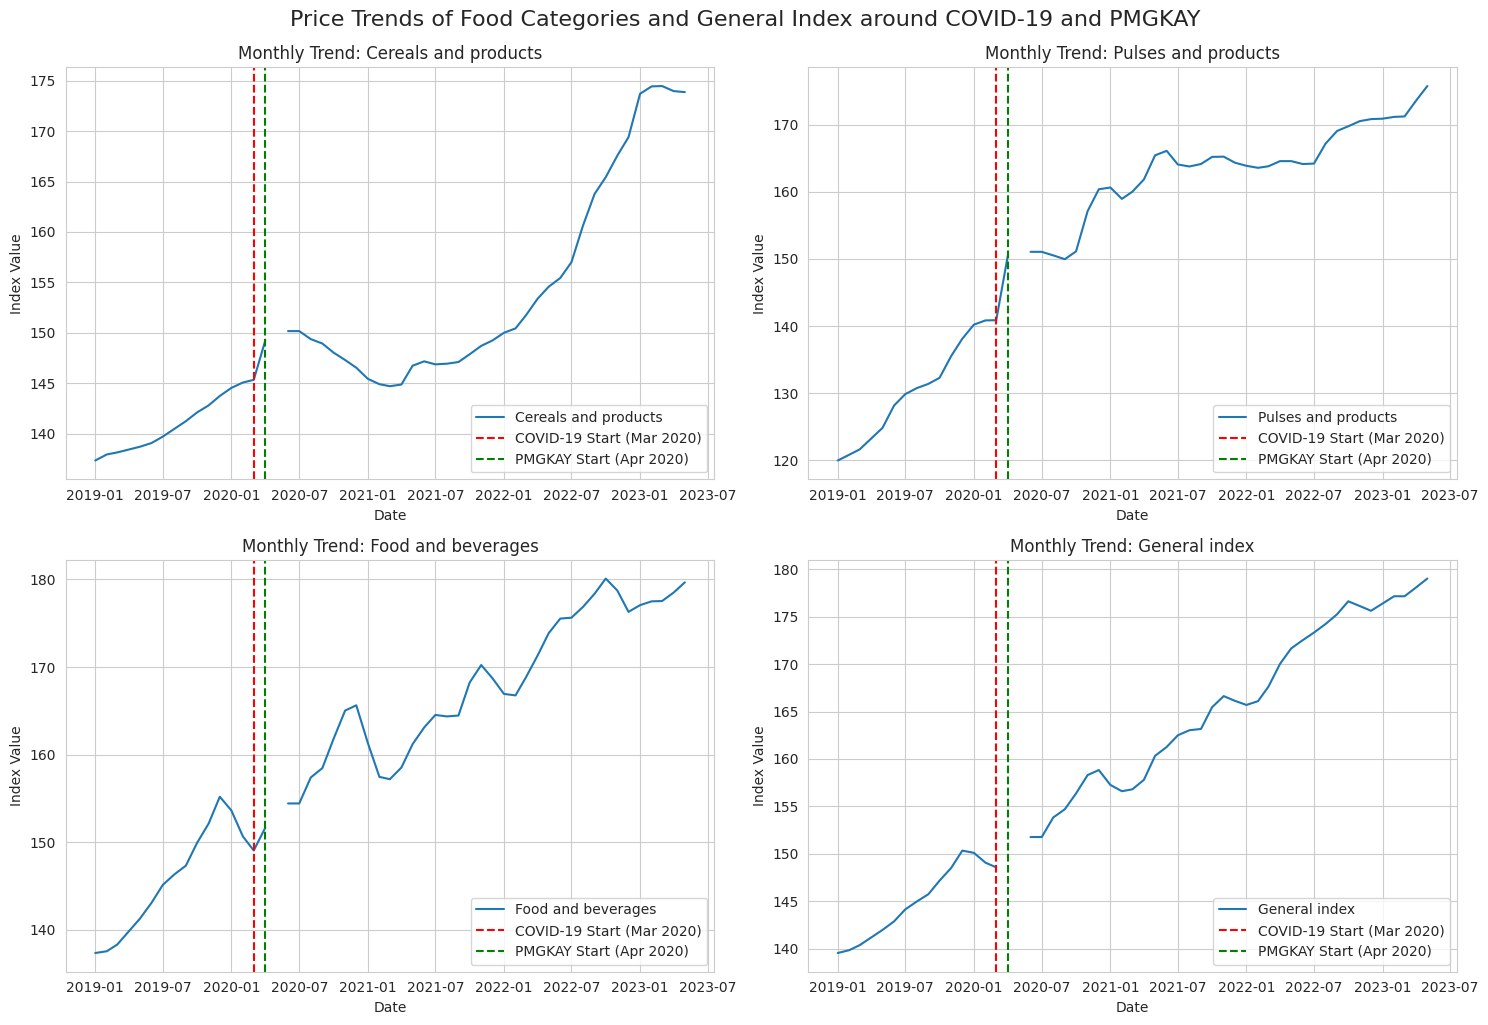

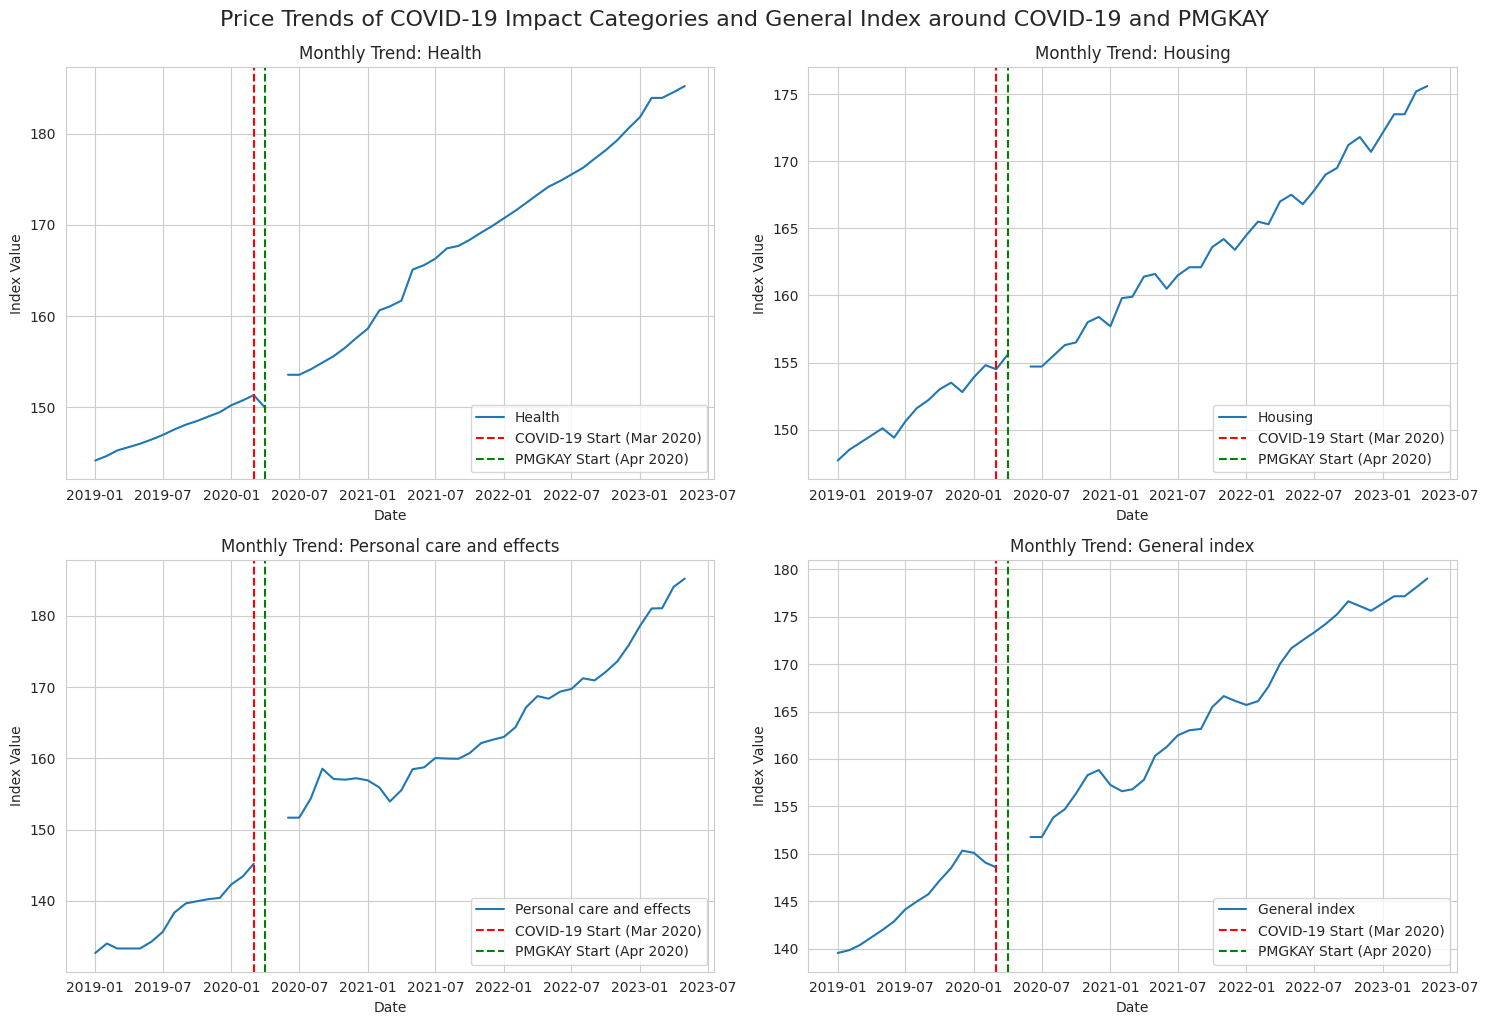

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Define periods for highlighting
covid_start_date = pd.to_datetime('2020-03-01')
pmgkay_start_date = pd.to_datetime('2020-04-01')
data_end_date = monthly_trends.index.max()

# Categories for PMGKAY impact visualization
food_categories_pmgkay = ['Cereals and products', 'Pulses and products', 'Food and beverages', 'General index']

# Categories for COVID-19 impact visualization
covid_impact_categories = ['Health', 'Housing', 'Personal care and effects', 'General index']

# Select data for visualization period (from a few months before COVID/PMGKAY)
visualization_start_date = pd.to_datetime('2019-01-01') # Start visualization from 2019
visualization_df = monthly_trends.loc[visualization_start_date:data_end_date].copy()

# Plotting PMGKAY-relevant categories
plt.figure(figsize=(15, 10))
for i, category in enumerate(food_categories_pmgkay):
    plt.subplot(2, 2, i + 1)
    plt.plot(visualization_df.index, visualization_df[category], label=category)
    plt.axvline(covid_start_date, color='red', linestyle='--', label='COVID-19 Start (Mar 2020)')
    plt.axvline(pmgkay_start_date, color='green', linestyle='--', label='PMGKAY Start (Apr 2020)')
    plt.title(f'Monthly Trend: {category}')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Price Trends of Food Categories and General Index around COVID-19 and PMGKAY', y=1.02, fontsize=16)
plt.show()

# Plotting COVID-19-relevant categories
plt.figure(figsize=(15, 10))
for i, category in enumerate(covid_impact_categories):
    plt.subplot(2, 2, i + 1)
    plt.plot(visualization_df.index, visualization_df[category], label=category)
    plt.axvline(covid_start_date, color='red', linestyle='--', label='COVID-19 Start (Mar 2020)')
    plt.axvline(pmgkay_start_date, color='green', linestyle='--', label='PMGKAY Start (Apr 2020)')
    plt.title(f'Monthly Trend: {category}')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Price Trends of COVID-19 Impact Categories and General Index around COVID-19 and PMGKAY', y=1.02, fontsize=16)
plt.show()

## Data wrangling

Prepare the data for correlation analysis and category share evolution analysis.


In [ ]:
# Identify numerical category columns and 'General index' from monthly_trends
# Exclude 'Year' which is a numerical column but not a price index category for this analysis
numerical_category_cols = [col for col in monthly_trends.columns if monthly_trends[col].dtype in ['float64', 'int64'] and col not in ['Year']]

# Ensure 'General index' is included
if 'General index' not in numerical_category_cols:
    numerical_category_cols.append('General index')

# Create the new DataFrame analysis_data
# Select only the identified numerical category columns and 'General index'
analysis_data = monthly_trends[numerical_category_cols].copy()

print("Created analysis_data DataFrame:")
display(analysis_data.head())
print("\nColumns in analysis_data:")
print(analysis_data.columns.tolist())

Created analysis_data DataFrame:


,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,108.800000,107.566667,110.366667,104.300000,104.866667,103.133333,102.333333,105.966667,106.033333,102.533333,...,100.3,105.466667,104.800000,104.033333,103.233333,103.133333,103.633333,104.500000,103.866667,104.566667
2013-02-01,110.833333,110.600000,113.300000,104.766667,105.233333,103.566667,103.500000,105.100000,104.866667,102.733333,...,100.4,105.966667,105.200000,104.533333,104.166667,103.633333,103.900000,104.466667,104.366667,105.266667
2013-03-01,111.833333,109.966667,111.433333,105.000000,104.600000,105.300000,102.466667,104.733333,103.933333,102.900000,...,100.4,106.066667,105.633333,104.933333,105.066667,103.733333,104.033333,104.266667,104.733333,105.500000
2013-04-01,112.133333,111.266667,106.500000,105.566667,104.066667,108.900000,106.200000,105.200000,103.233333,103.333333,...,100.5,106.466667,106.300000,105.366667,104.700000,104.233333,105.000000,102.933333,104.833333,106.066667
2013-05-01,112.866667,111.766667,104.433333,106.600000,103.566667,109.333333,114.633333,105.700000,102.900000,104.433333,...,100.5,107.366667,106.933333,105.933333,104.000000,104.800000,105.600000,102.333333,104.833333,106.900000



Columns in analysis_data:
['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.', 'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light', 'Household goods and services', 'Health', 'Transport and communication', 'Recreation and amusement', 'Education', 'Personal care and effects', 'Miscellaneous', 'General index']


In [ ]:
# Check for missing values in the new analysis_data DataFrame
print("Missing values in analysis_data before handling:")
print(analysis_data.isnull().sum())

# Fill missing values using time-based interpolation
analysis_data = analysis_data.interpolate(method='time')

# Use forward fill and then backward fill as fallback for any remaining NaNs
analysis_data = analysis_data.fillna(method='ffill').fillna(method='bfill')

print("\nMissing values in analysis_data after handling:")
print(analysis_data.isnull().sum())

# Verify that no missing values remain
print("\nTotal missing values remaining:", analysis_data.isnull().sum().sum())

Missing values in analysis_data before handling:
Cereals and products                   1
Meat and fish                          2
Egg                                    1
Milk and products                      1
Oils and fats                          1
Fruits                                 1
Vegetables                             1
Pulses and products                    1
Sugar and Confectionery                1
Spices                                 1
Non-alcoholic beverages                1
Prepared meals, snacks, sweets etc.    2
Food and beverages                     1
Pan, tobacco and intoxicants           2
Clothing                               2
Footwear                               2
Clothing and footwear                  2
Housing                                1
Fuel and light                         1
Household goods and services           2
Health                                 1
Transport and communication            2
Recreation and amusement               2
Educatio

<ipython-input-32-981716918>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  analysis_data = analysis_data.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# For category share evolution analysis, calculate the share of each category
# relative to the 'General index'.
# Avoid division by zero by adding a small epsilon or checking if 'General index' is zero.
# Given this is price indices, 'General index' is highly unlikely to be zero or negative.
# We can safely divide, assuming 'General index' is always positive.

# Select all columns except 'General index' to calculate their share
category_cols_for_share = [col for col in analysis_data.columns if col != 'General index']

# Calculate the share for each category
category_share_df = (analysis_data[category_cols_for_share].div(analysis_data['General index'], axis=0)) * 100

print("Created category_share_df DataFrame (Percentage share relative to General Index):")
display(category_share_df.head())
print("\nColumns in category_share_df:")
print(category_share_df.columns.tolist())

Created category_share_df DataFrame (Percentage share relative to General Index):


,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,...,Clothing and footwear,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,104.048454,102.868983,105.546701,99.744979,100.286898,98.629264,97.864201,101.338859,101.402614,98.055467,...,101.498247,95.919668,100.860695,100.223143,99.489959,98.724896,98.629264,99.107427,99.936245,99.330571
2013-02-01,105.288157,105.066498,107.631412,99.525016,99.968334,98.385054,98.321723,99.841672,99.620013,97.593414,...,101.393287,95.376821,100.664978,99.936669,99.303357,98.955035,98.448385,98.701710,99.240025,99.145028
2013-03-01,106.003160,104.233807,105.624013,99.526066,99.146919,99.810427,97.124803,99.273302,98.515008,97.535545,...,101.674566,95.165877,100.537125,100.126382,99.462875,99.589258,98.325434,98.609795,98.830964,99.273302
2013-04-01,105.719673,104.902577,100.408548,99.528598,98.114393,102.671276,100.125707,99.182904,97.328724,97.423004,...,101.697046,94.751728,100.377121,100.219987,99.340038,98.711502,98.271527,98.994343,97.045883,98.837209
2013-05-01,105.581540,104.552541,97.692548,99.719364,96.881821,102.276271,107.234175,98.877456,96.258185,97.692548,...,101.465544,94.013096,100.436545,100.031182,99.095728,97.287184,98.035547,98.783910,95.728095,98.066729



Columns in category_share_df:
['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.', 'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light', 'Household goods and services', 'Health', 'Transport and communication', 'Recreation and amusement', 'Education', 'Personal care and effects', 'Miscellaneous']


## Data analysis

Compute the correlation matrix between different categories to understand interconnected price behavior.


In [ ]:
# 1. Calculate the pairwise correlation between all columns in the analysis_data DataFrame
correlation_matrix = analysis_data.corr()

# 2. Store the resulting correlation matrix in a variable named correlation_matrix (already done in step 1)

# 3. Print or display the correlation_matrix
print("Correlation Matrix between Categories:")
display(correlation_matrix)

Correlation Matrix between Categories:


,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Cereals and products,1.000000,0.936386,0.915842,0.981610,0.849717,0.915191,0.569785,0.622157,0.751760,0.977098,...,0.960561,0.963554,0.977761,0.968139,0.934634,0.969569,0.961823,0.970683,0.969735,0.973021
Meat and fish,0.936386,1.000000,0.960971,0.951776,0.944384,0.908819,0.625672,0.670064,0.714986,0.948297,...,0.953915,0.956520,0.963253,0.981113,0.977286,0.981829,0.953967,0.985730,0.984544,0.980645
Egg,0.915842,0.960971,1.000000,0.929638,0.920434,0.861004,0.625048,0.645280,0.724727,0.923837,...,0.937590,0.938384,0.943168,0.959947,0.953471,0.957097,0.933184,0.962300,0.961935,0.959636
Milk and products,0.981610,0.951776,0.929638,1.000000,0.866167,0.954058,0.591907,0.683157,0.753170,0.973073,...,0.980934,0.964989,0.988838,0.975959,0.931896,0.981170,0.982847,0.968239,0.975977,0.986193
Oils and fats,0.849717,0.944384,0.920434,0.866167,1.000000,0.835611,0.526924,0.649364,0.654957,0.902639,...,0.856504,0.938141,0.897619,0.921756,0.972069,0.921452,0.853546,0.925169,0.931989,0.918988
Fruits,0.915191,0.908819,0.861004,0.954058,0.835611,1.000000,0.554597,0.622156,0.727392,0.908779,...,0.940284,0.920631,0.940919,0.923522,0.887638,0.932796,0.938119,0.909533,0.926377,0.939815
Vegetables,0.569785,0.625672,0.625048,0.591907,0.526924,0.554597,1.000000,0.423666,0.446908,0.553073,...,0.617778,0.547279,0.588015,0.599686,0.583666,0.604266,0.621642,0.607719,0.605085,0.645913
Pulses and products,0.622157,0.670064,0.645280,0.683157,0.649364,0.622156,0.423666,1.000000,0.407204,0.739707,...,0.599824,0.619222,0.640972,0.632510,0.616183,0.642692,0.623092,0.642060,0.636459,0.669428
Sugar and Confectionery,0.751760,0.714986,0.724727,0.753170,0.654957,0.727392,0.446908,0.407204,1.000000,0.711972,...,0.760880,0.732529,0.754830,0.737559,0.698457,0.746005,0.758739,0.745390,0.741858,0.750834
Spices,0.977098,0.948297,0.923837,0.973073,0.902639,0.908779,0.553073,0.739707,0.711972,1.000000,...,0.932902,0.970707,0.969385,0.963691,0.952290,0.965260,0.938410,0.970388,0.968507,0.973233


## Data visualization

Visualize the correlation matrix.


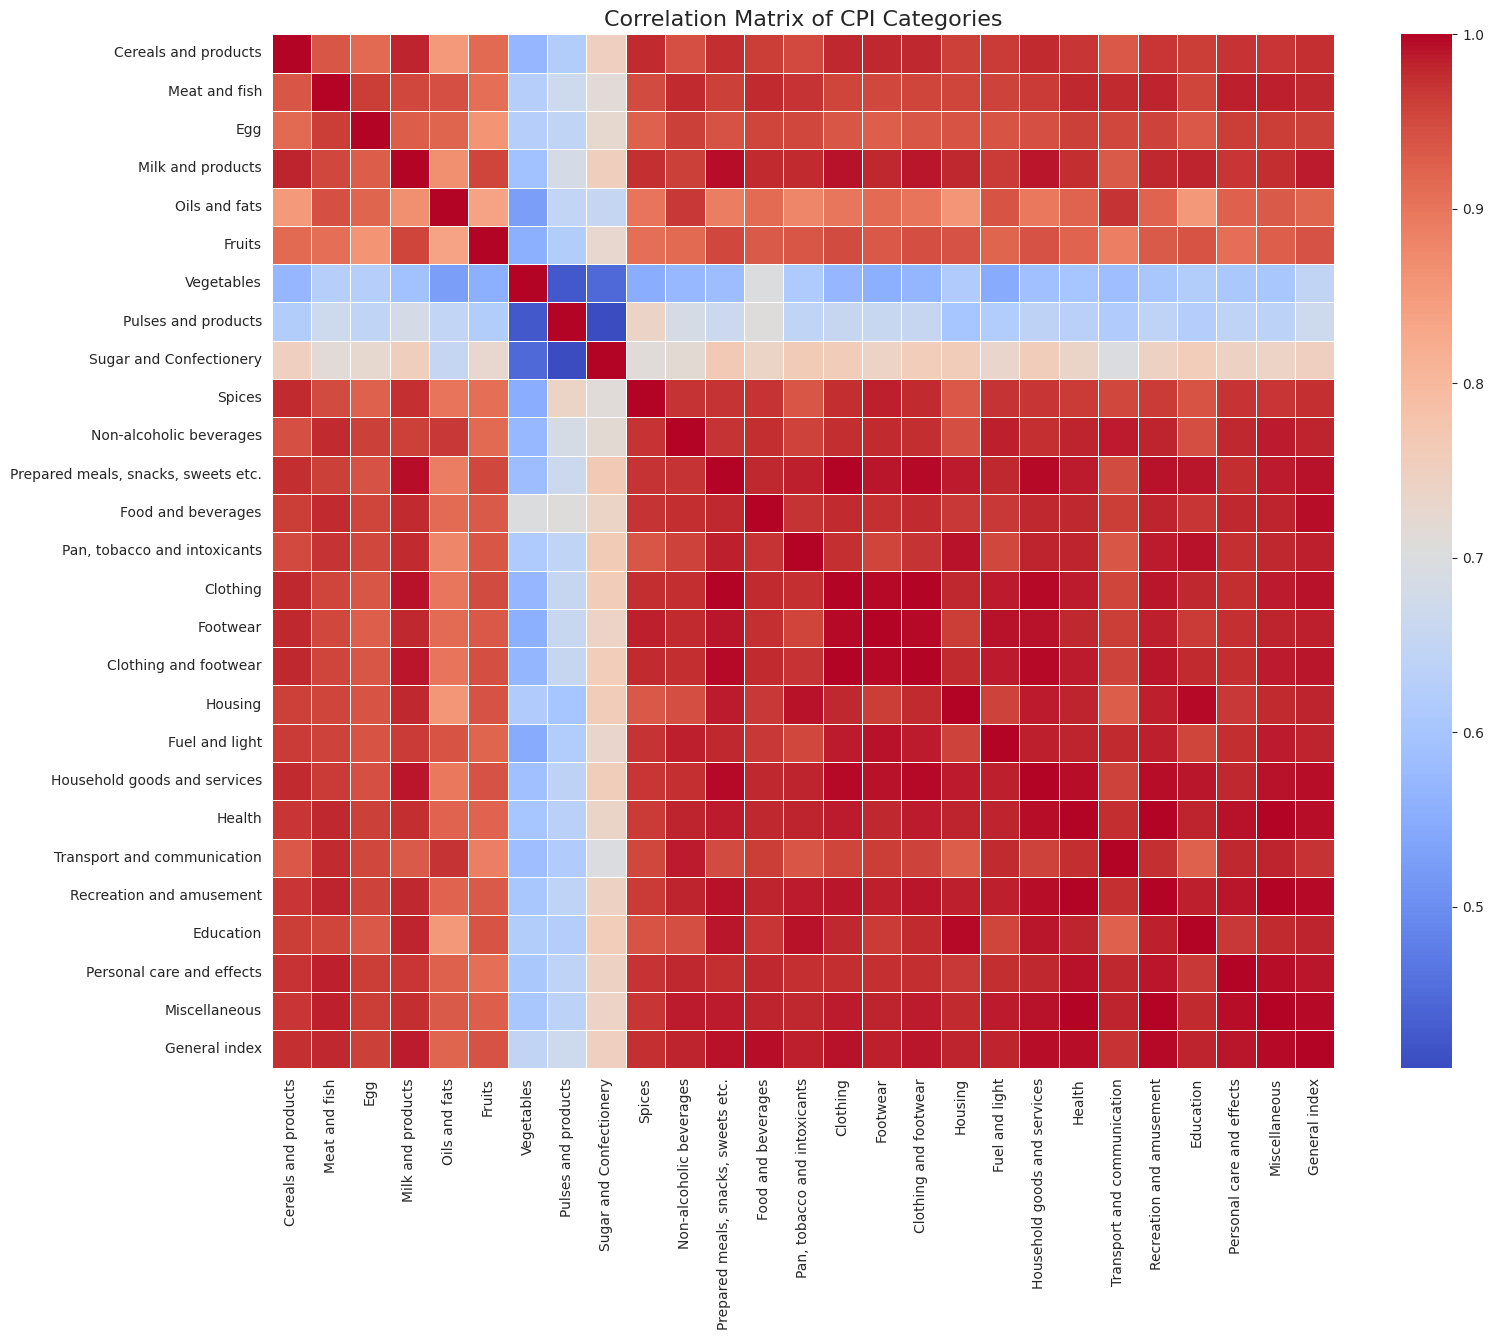

In [ ]:
# 2. Create a heatmap of the correlation_matrix using seaborn.heatmap().
# Adjust figure size based on the number of categories for better readability.
num_categories = correlation_matrix.shape[0]
plt.figure(figsize=(num_categories * 0.6, num_categories * 0.5)) # Adjust size based on number of categories

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 5. Set the title of the plot to 'Correlation Matrix of CPI Categories'.
plt.title('Correlation Matrix of CPI Categories', fontsize=16)

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# 6. Display the plot using matplotlib.pyplot.show().
plt.show()

## Conclusion: Understanding Inflation Dynamics in India (2013–2023)
Over the last decade, India has experienced a ~73% rise in overall consumer prices, driven by a mix of volatile essentials, steadily rising core sectors, and evolving consumer habits.

Volatile categories like Vegetables and Fruits showed high standard deviation, indicating susceptibility to seasonal fluctuations, climate change, and supply chain disruptions, making them key short-term inflation drivers. In contrast, Cereals, Milk, and Pulses remained stable, highlighting their resilience and the importance of reliable supply systems or policy buffers.

Essential and processed food items such as Pulses, Oils, Milk, and Ready Meals displayed steady price growth, marking them as major contributors to long-term food inflation. Similarly, non-food essentials like Housing, Health, and Education showed significant inflation, with Housing costs rising ~75% and Health and Education nearly doubling, reflecting urbanization, increased service demand, and limited affordability for middle-income groups.

The correlation matrix reinforces that most CPI categories are tightly linked, meaning inflation is often broad-based rather than isolated. However, categories like Vegetables and Sugar show weak correlation with others, reflecting independent price behavior due to perishability or policy controls.

The COVID-19 pandemic had a significant impact on category-level inflation. Health costs spiked from mid-2020 onward, and Personal Care saw a jump due to hygiene demand. Despite interventions like PMGKAY, inflation pressure persisted post-2020, indicating limited short-term impact of such welfare measures on headline inflation.

Moreover, consistent growth in Prepared Meals, Non-Alcoholic Beverages, and Personal Care suggests a rise in disposable incomes and a shift toward convenience-oriented consumption, especially among urban and working populations.

On the policy side, Pan, Tobacco, and Intoxicants remained stable, likely due to tax regulation, showing how targeted controls can anchor inflation in sensitive categories. Meanwhile, Fuel and Transport's strong correlation indicates that fuel price changes ripple through logistics and commuting, influencing broader inflation.

Lastly, the stability of Core Inflation (excluding Food and Fuel) makes it a more reliable tool for monetary policy, as it reflects fundamental price movement without the noise of short-term shocks.



## TL;DR
India's inflation is not driven by one category but is the result of interconnected price dynamics, consumer behavior shifts, and structural challenges. For effective inflation management, multi-sectoral strategies are essential—focusing on supply chain efficiency, targeted subsidies, infrastructure improvements, and macro-level policy adjustments to balance short-term relief with long-term stability.